<a href="https://colab.research.google.com/github/arincons2/RandomForest/blob/main/A_RINCON_FullCodeNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries for data manipulation
import numpy as np
import pandas as pd
#import math

#Definiing the number of displayed columns and rows
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing stats libraries and tools
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

#importing sklearn libraries and tools:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor# import methods to build decision trees regressor
from sklearn.tree import DecisionTreeClassifier # import methods to build decision trees classifier
#from sklearn.ensemble import RandomForestRegressor# import methods to build random forest regressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.ensemble import RandomForestClassifier # import methods to build random forest classifier

from sklearn.preprocessing import LabelEncoder# To encode categorical variables
from sklearn.model_selection import GridSearchCV # For tuning different models

from sklearn import metrics #metrics to evaluate the model
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error # To check model performance

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

Importing the data

In [ ]:
# importing drive:
from google.colab import drive
drive.mount('/content/drive')

#path with data
path_extraalearn="/content/drive/MyDrive/COLAB_PROJECT2_week8/ExtraaLearn.csv"
df = pd.read_csv(path_extraalearn)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of rows and columns

In [ ]:
df.shape

(4612, 15)

we can see that there are 4612 rows and 15 columns

Datatypes of the different columns in the dataset

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
cat_cols = ['status','current_occupation', 'first_interaction','profile_completed','last_activity', 'print_media_type1','print_media_type2','digital_media','educational_channels','referral']
num_cols = ['age','website_visits','time_spent_on_website','page_views_per_visit']

We can see that:
- there are 4612 data (rows), and all of them (4612) are non-null
- ID is a name
- age is an integer
- current_occupation is a name
- first_interaction is a name
- profile_completed is a name
- website_visits  is an integer
- time_spent_on_website is an integer
- page_views_per_visit is a real (float)
- last_activity is a name

- the channels (print_media_type1, print_media_type2, digital_media, educational_channels, referral) are names (object).   
- status (the label/output) is an integer

In addition: the data types are proper, so that there is not need to convert data types.

In [ ]:
df.head()

ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   
3  Website Activity                No                No            No   
4    Email Activity                No                No            No   

  educational_channels referral  status  
0                   No       No       1  
1                  Yes       No       0  
2                   No       No       0  
3                   No       No       1  
4                   No       No       0

In [ ]:
df.tail()

ID  age current_occupation first_interaction profile_completed  \
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
4607              15                    360                 2.170   
4608               8                   2327                 5.393   
4609               2                    212                 2.692   
4610               1                    154                 3.879   
4611               4                   2290                 2.075   

         last_activity print_media_type1 print_media_type2 digital_media  \
4607    Phone Activity                No                No            No   
4608    Email Activity                No                No            No   
4609    Email Activity                No                No            No   
4610  Website Activity               Yes                No            No   
4611    Phone Activity                No                No            No   

     educational_channels referral  status  
4607                  Yes       No       0  
4608                   No       No       0  
4609                   No       No       1  
4610                   No       No       0  
4611                   No       No       0

Search for missing values:

In [ ]:
df.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [ ]:
# Checking unique values in each column
df[cat_cols].nunique()

status                  2
current_occupation      3
first_interaction       2
profile_completed       3
last_activity           3
print_media_type1       2
print_media_type2       2
digital_media           2
educational_channels    2
referral                2
dtype: int64

In [ ]:
df.duplicated().sum()

0

#Observations:
we can see that:
- there are 4612 rows and 15 columns. The 'info' command indicates that each column has 4612 values.
- the results of the 'isna' command  indicate that there are no missing values. Therefore, none of the variables have missing values
- there are no duplicated data
- NUMERICAL FEATURES: age, website_visits, time_spent_on_website, page_views_per_visit
- CATEGORICAL FEATURES: current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral
- OUTPUT: status \\

- current_occupation has 3 unique categories
- first_interaction has 2 unique categories
- profile_completed has 3 unique categories
- last_activity has 3 unique categories
- the channels (print_media_type1, print_media_type2, digital_media, educational_channels, referral), each one has 2 unique categories

## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## **Univariate analysis of numerical columns**

 Statistical summary of the data:

In [ ]:
df[num_cols].describe(include='all').T

count        mean         std   min        25%  \
age                    4612.0   46.201214   13.161454  18.0   36.00000   
website_visits         4612.0    3.566782    2.829134   0.0    2.00000   
time_spent_on_website  4612.0  724.011275  743.828683   0.0  148.75000   
page_views_per_visit   4612.0    3.026126    1.968125   0.0    2.07775   

                           50%         75%       max  
age                     51.000    57.00000    63.000  
website_visits           3.000     5.00000    30.000  
time_spent_on_website  376.000  1336.75000  2537.000  
page_views_per_visit     2.792     3.75625    18.434

Observations:

- For the numerical features (age, website_visits, time_spent_on_website,
page_views_per_visit), there are no illogical values  
- The minimum value of age is 18, and the maximum is 63. These values are realistic.
- For [ website_visits, time_spent_on_website,
page_views_per_visit], the minimum value of is 0; and their maximum values are 30, 2537, 18.4. These values are realistic.  

In [ ]:
# Command to tell Python to actually display the graphs
%matplotlib inline

Histogram:

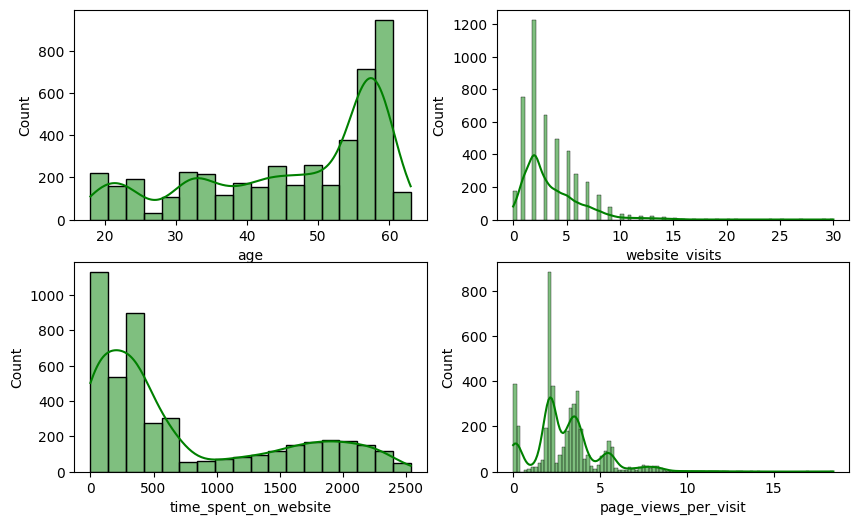

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(10,6))#(16,8)
sns.histplot(ax=axes[0, 0], data=df, x='age',color='green',kde = True);
sns.histplot(ax=axes[0, 1], data=df, x='website_visits',color='green',kde = True);
sns.histplot(ax=axes[1, 0], data=df, x='time_spent_on_website',color='green',kde = True);
sns.histplot(ax=axes[1, 1], data=df, x='page_views_per_visit',color='green',kde = True);

Boxplot:

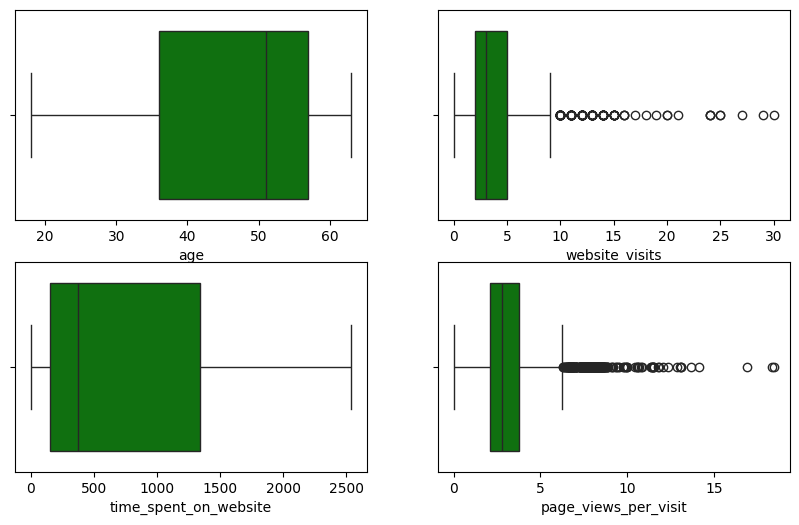

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(10,6))#(16,8)
sns.boxplot(ax=axes[0, 0], data=df, x='age',color='green');
sns.boxplot(ax=axes[0, 1], data=df, x='website_visits',color='green');
sns.boxplot(ax=axes[1, 0], data=df, x='time_spent_on_website',color='green');
sns.boxplot(ax=axes[1, 1], data=df, x='page_views_per_visit',color='green');

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )

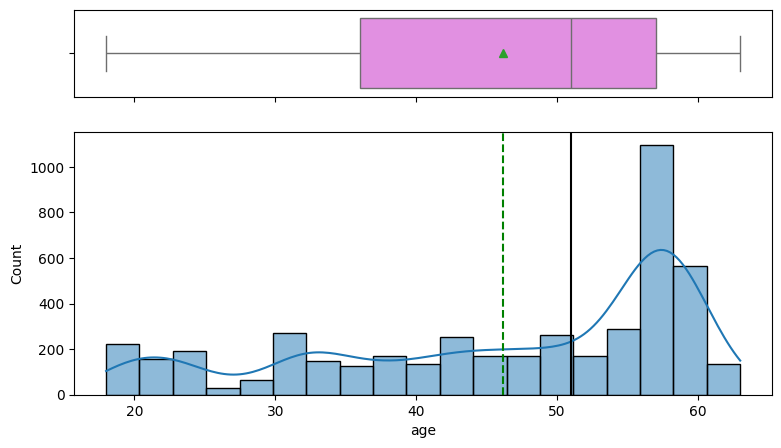

In [ ]:
histogram_boxplot(df, "age", kde = True, bins = 19)

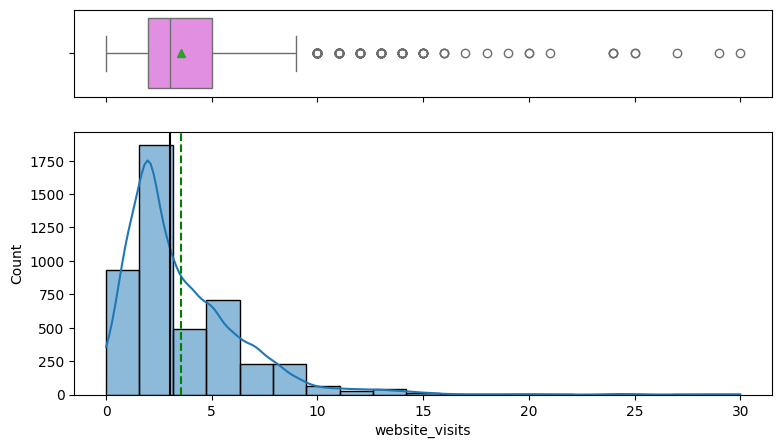

In [ ]:
histogram_boxplot(df, "website_visits", kde = True, bins = 19)

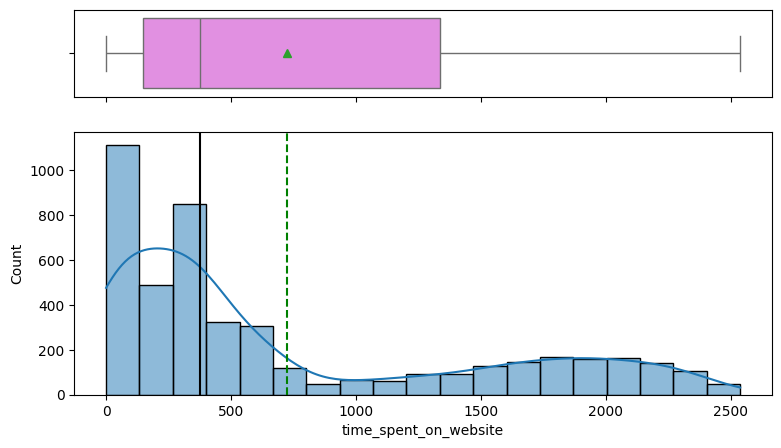

In [ ]:
histogram_boxplot(df, "time_spent_on_website", kde = True, bins = 19)

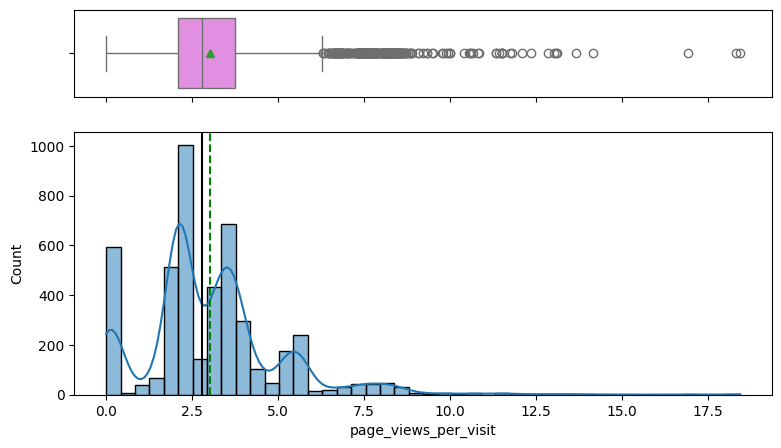

In [ ]:
histogram_boxplot(df, "page_views_per_visit", kde = True, bins = 44)

#Observations:
- age: the distribution of age is not normal, it is left skewed asymmetrical.
 There is a higher number of people with age in the range 55-65 years.
- website_visits: the distribution is not normal; it is right skewed.
 There is a higher number of website visits in the range 3-4 visits.     
- time_spent_on_website: the distribution is not normal; it is right-skewed
 and it seems bimodal. There is a higher number of cases with time_spent_on_websit in the range 0-400.
- page_views_per_visit: the distribution is not normal; it is right-skewed
and it seems bimodal. There is a higher number of cases with page_views_per_visit in the range 2.0-2.4.

## **Univariate analysis of categorical columns**

In [ ]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

status
0    0.701431
1    0.298569
Name: proportion, dtype: float64
****************************************
current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
N

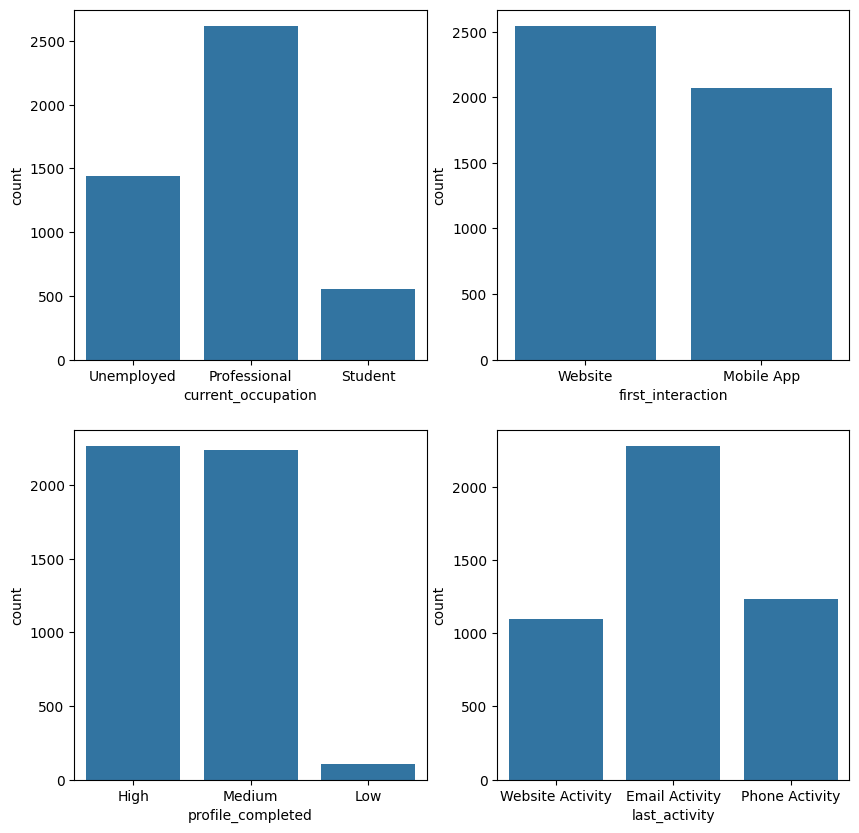

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(10,10))#(16,8)
sns.countplot(ax=axes[0, 0], data=df, x='current_occupation') ;
sns.countplot(ax=axes[0, 1], data=df, x='first_interaction') ;
sns.countplot(ax=axes[1, 0], data=df, x='profile_completed') ;
sns.countplot(ax=axes[1, 1], data=df, x='last_activity') ;

#Observations:
- status: the rate of paid customers is 29%
- current_occupation: 56.7% is professional, 31% unemployed, and 12% student
- first_interaction: 55% of the leads used website as first interaction media,
 and 44.9 used mobile app.   
- profile_completed: 49% of the leads had a high completion of the profile, 48.5% had a medium completion, and 2.3% had a low completion
- last_activity: 49.3% of the leads used Email as last activity,
 26.7% used phone, and 23.9 used website as last activity.
   
- print_media_type1: 10.8% of the leads saw the ad of ExtraaLearn in the Newspaper.
- print_media_type2: 5% of the leads saw the ad of ExtraaLearn in the Magazine
- digital_media: 11.4% of the leads saw the ad of ExtraaLearn in the digital platforms.  
- educational_channels: 15.3% of the leads heard about ExtraaLearn in educational channels.  
- referral: 2% of the leads heard about ExtraaLearn through reference.   

## **Bivariate and multivariate analysis**

Boxplots:

([0, 1, 2],
 [Text(0, 0, 'Unemployed'), Text(1, 0, 'Professional'), Text(2, 0, 'Student')])

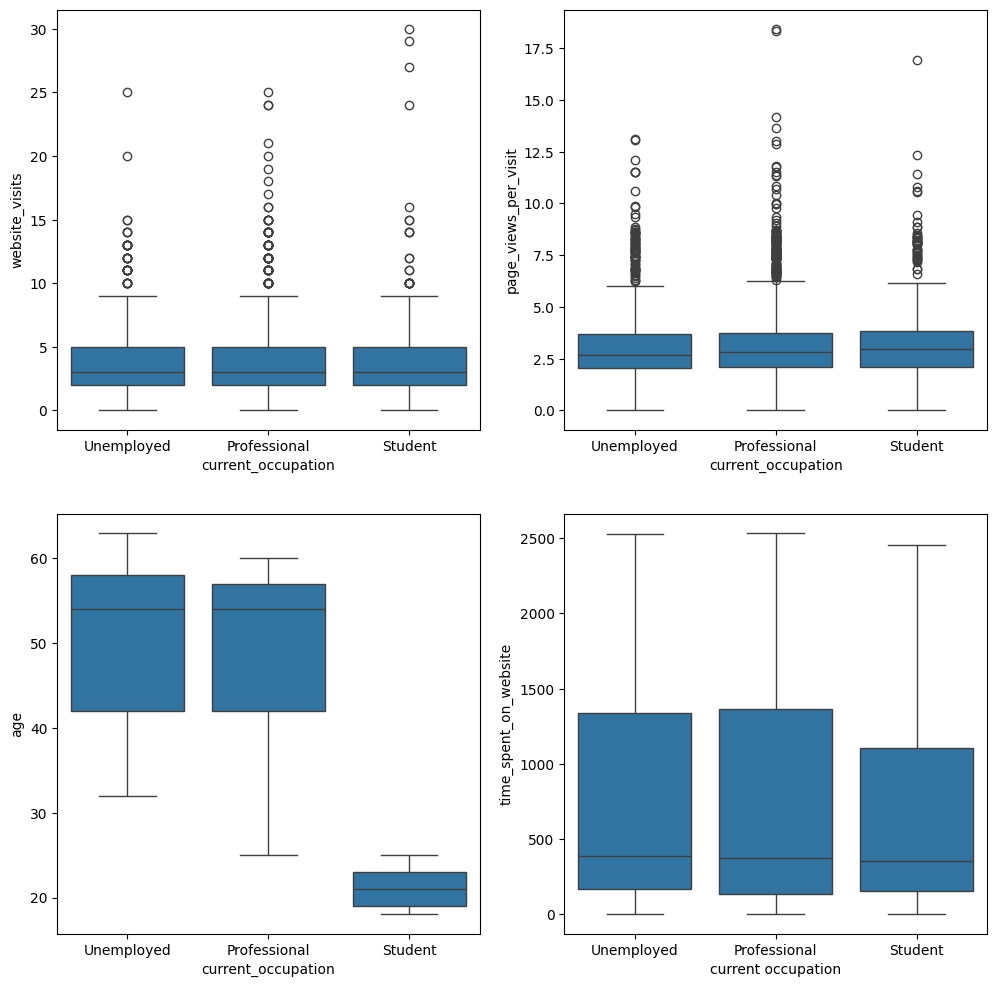

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(12,12))#(16,8)
sns.boxplot(ax=axes[0, 0],data=df, x='current_occupation', y='website_visits') ;
#plt.title('Boxplot: web site visits, according to current occupation')
#plt.xlim(30,300)
plt.xlabel('current occupation')
plt.ylabel('web site visits')
sns.axes_style('whitegrid')
plt.xticks(rotation=90)

sns.boxplot(ax=axes[0, 1],data=df, x='current_occupation', y='page_views_per_visit') ;
plt.xlabel('current occupation')
plt.ylabel('page views per visit')
sns.axes_style('whitegrid')
plt.xticks(rotation=90)

sns.boxplot(ax=axes[1, 0],data=df, x='current_occupation', y='age') ;
#plt.title('Boxplot: age, according to current occupation')
#plt.xlim(30,300)
plt.xlabel('current occupation')
plt.ylabel('age')
sns.axes_style('whitegrid')
plt.xticks(rotation=90)

sns.boxplot(ax=axes[1, 1],data=df, x='current_occupation', y='time_spent_on_website') ;
plt.xlabel('current occupation')
plt.ylabel('time_spent_on_website')
sns.axes_style('whitegrid')
plt.xticks(rotation=0)

#Observations:
- the age depends on the current occupation: the medium age for students
is approximately 20 years; and the medium age for unemployed and for professionals is approximately 54 years.
- the count of website visits does not depend on the current occupation,  
and the count of page_views_per_visit does not depend on the current occupation

Countplots

In [ ]:
#fig, axes = plt.subplots(1, 2, sharex=False, figsize=(11,6))#(16,8)
#sns.countplot(ax=axes[0], data=df, x='current_occupation', hue='age',) ;
#sns.countplot(ax=axes[1], data=df, x='profile_completed', hue='current_occupation') ;

Let's now check how does status is related with other categorical variables.

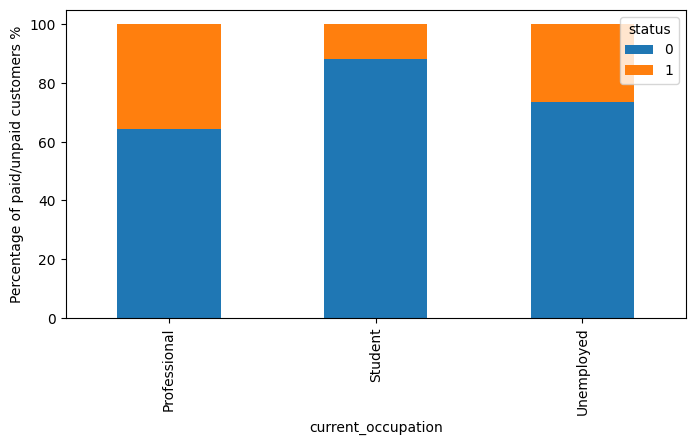

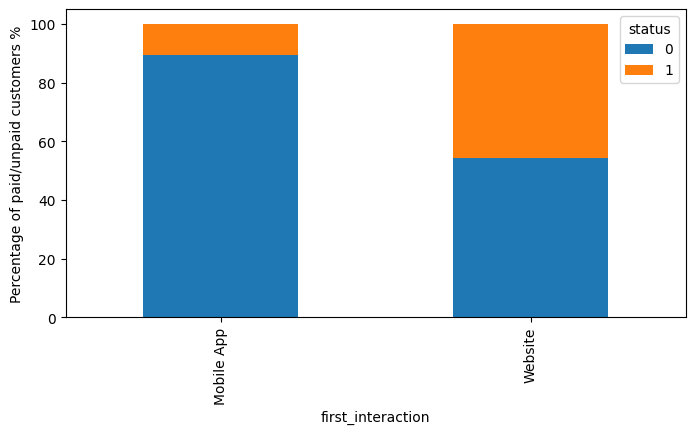

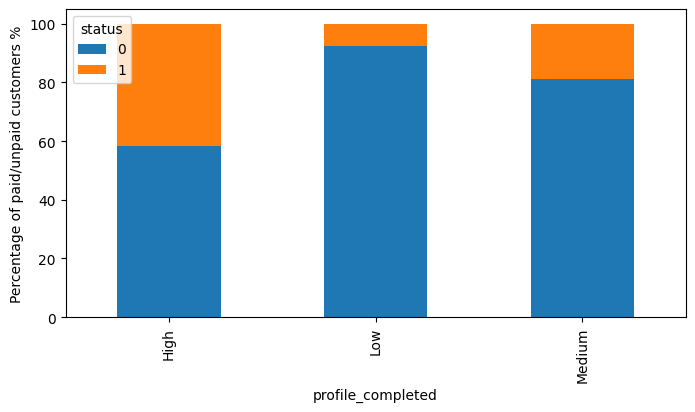

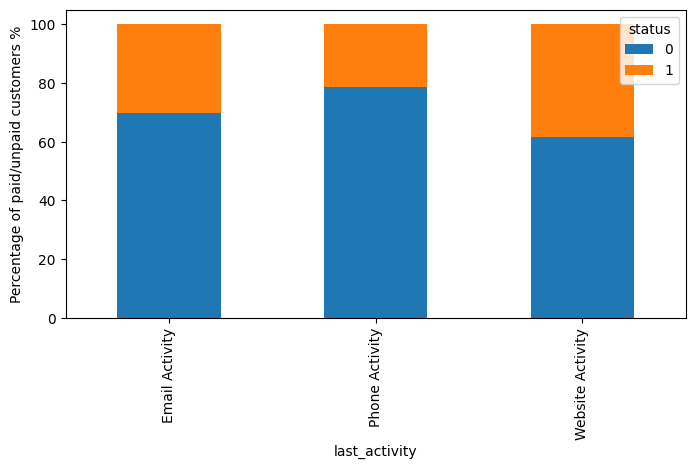

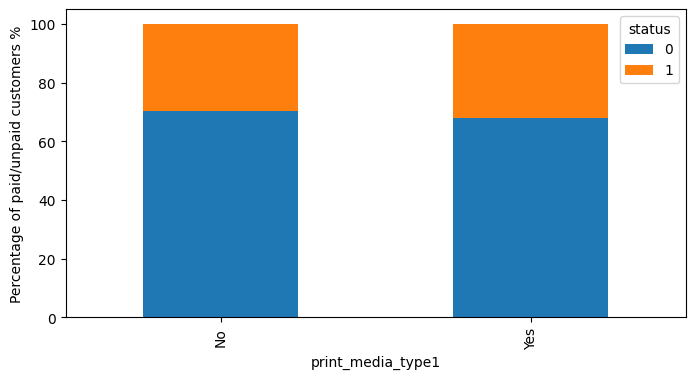

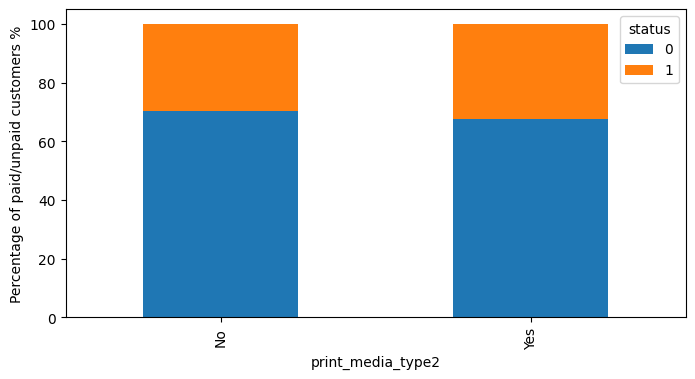

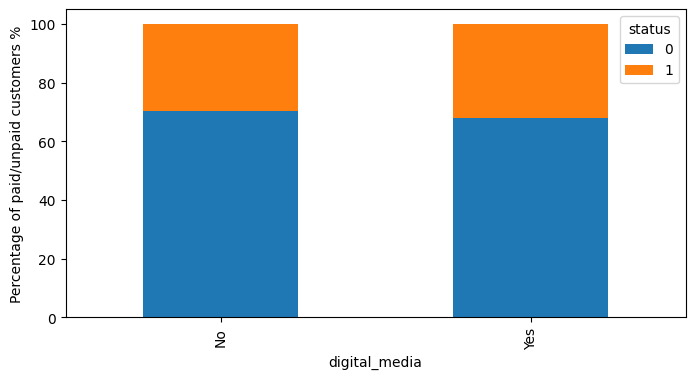

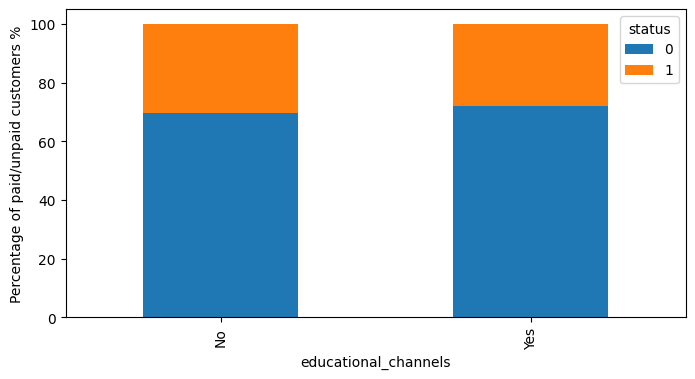

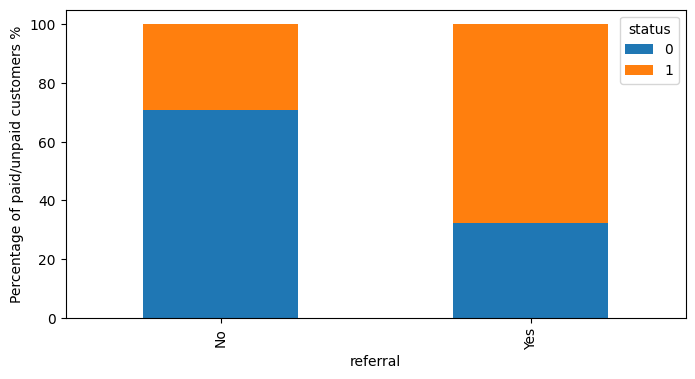

In [ ]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage of paid/unpaid customers %')

# Observations:
- current_occupation: among professional leads there is approximately 35% chance of becoming paid customer.  
- first_interaction: among the leads whose first interaction is through website, there is approximately 45% chance of becoming paid customer.   
- profile_completed: among the leads that have a high completion of profile,
there is approximately 40% chance of becoming paid customer
- last_activity: among the leads whose last activity is Website,
there is approximately 40% chance of becoming paid customer.
- print_media_type1: among the leads that saw the ad of ExtraaLearn in the Newspaper, there is approximately 30% chance of becoming paid customer.  
- print_media_type2: among the leads that saw the ad of ExtraaLearn in the Magazine, there is approximately 30% chance of becoming paid customer.
- digital_media: among the leads that saw the ad of ExtraaLearn in the digital platforms,
 there is approximately 35% chance of becoming paid customer.
- educational_channels: among the leads that heard about ExtraaLearn in educational channels, there is approximately 30% chance of becoming paid customer.
- referral: among the leads that heard about ExtraaLearn through reference,
there is approximately 70% chance of becoming paid customer.

Let's now check how does status is related with numerical variables.

In [ ]:
# Mean of numerical variables grouped by attrition
df.groupby(['status'])[num_cols].mean()

age  website_visits  time_spent_on_website  page_views_per_visit
status                                                                        
0       45.153014        3.578980             577.420711              3.025732
1       48.663762        3.538126            1068.397967              3.027050

#Observations:
- paid customers are 7.8 % older than unpaid ones \
- paid customers  have 85% more time spent on website than unpaid customers


Pairplots:

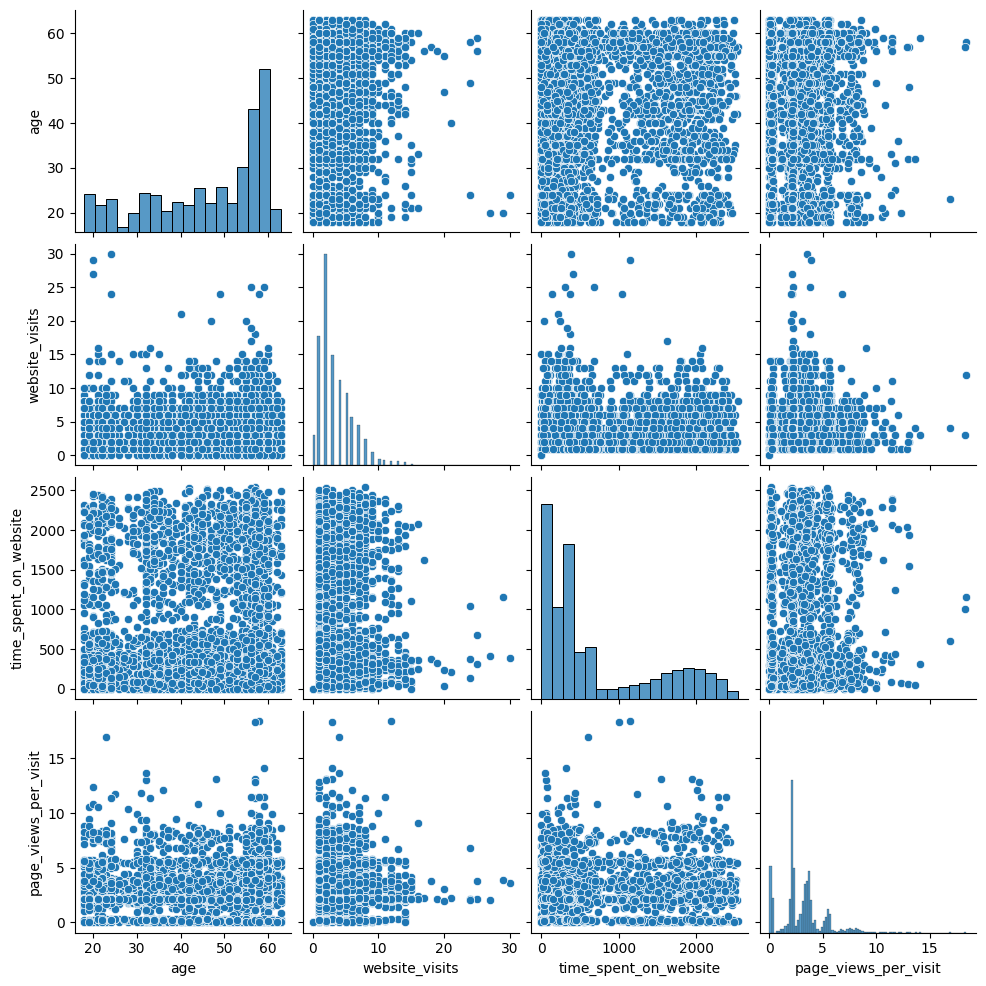

In [ ]:
sns.pairplot(data=df[['age','website_visits','time_spent_on_website','page_views_per_visit']])

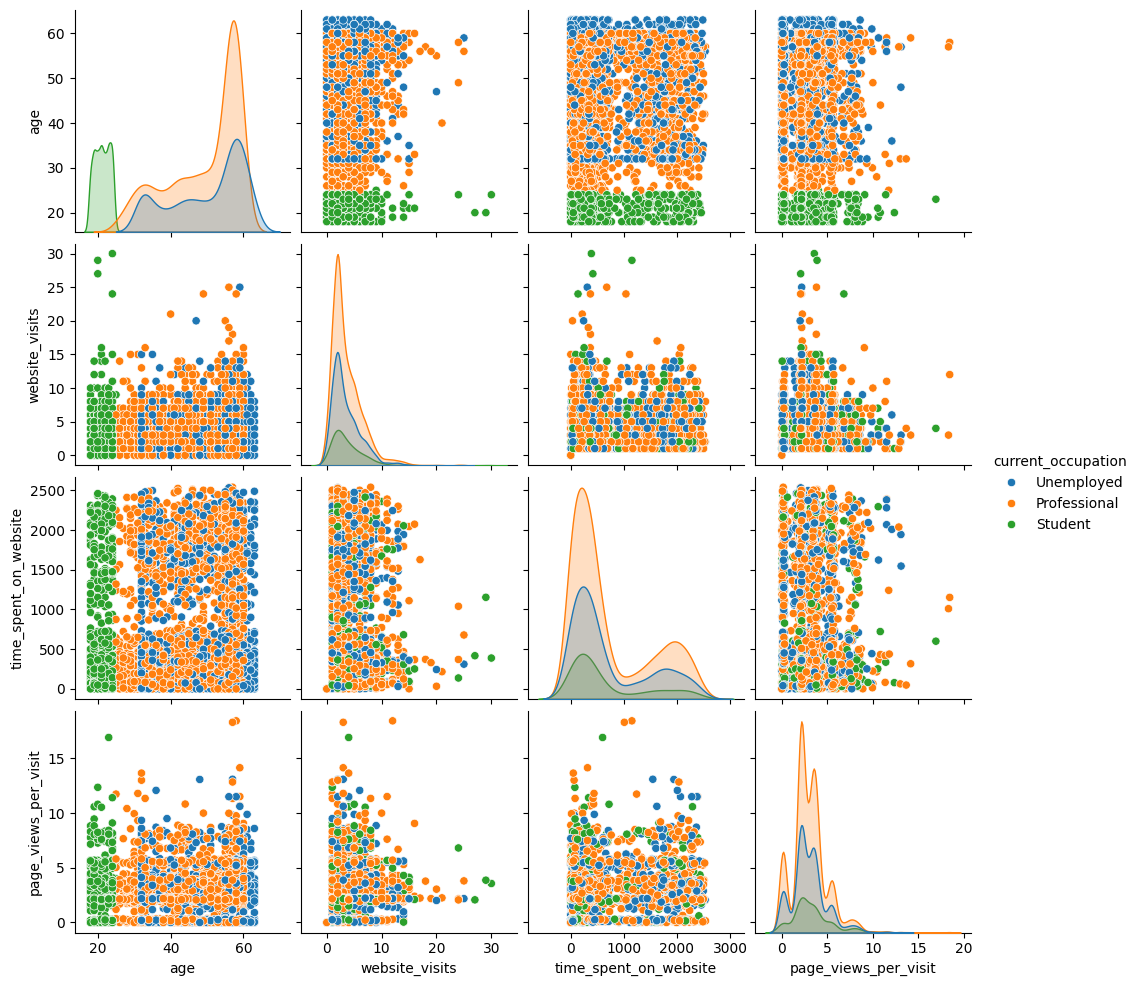

In [ ]:
sns.pairplot(data=df, vars=['age','website_visits','time_spent_on_website','page_views_per_visit'], hue='current_occupation');

**Heatmaps:**

<Axes: >

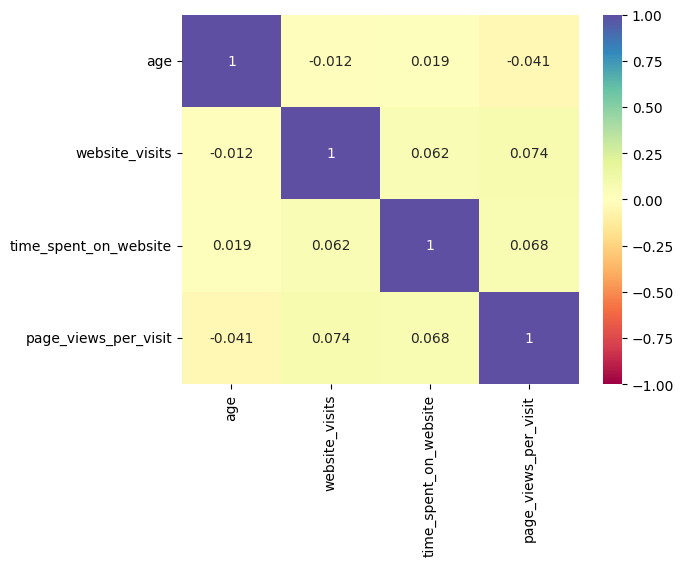

In [ ]:
sns.heatmap(df[['age','website_visits','time_spent_on_website','page_views_per_visit']].corr(), annot = True, cmap = 'Spectral', vmin = -1, vmax = 1)
#dt.corr() by dt[['A','B','C']].corr()
#'age','website_visits','time_spent_on_website','page_views_per_visit'

# Observations:
- the correlation between the features
'age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit' is very few. \
Therefore, there is not need to eliminate any of them.
- in the pairplot, there are not any clear relationships.


**ANSWER TO QUESTIONS**
## First question
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64

 Professional, succes count is: 929
     Then, the success percentage: 35.51223241590214
Unemployed, the succes count is: 383
    Then, the success percentage: 26.578764746703676
From Student, the succes count is: 65
     Then, the success percentage: 11.711711711711711


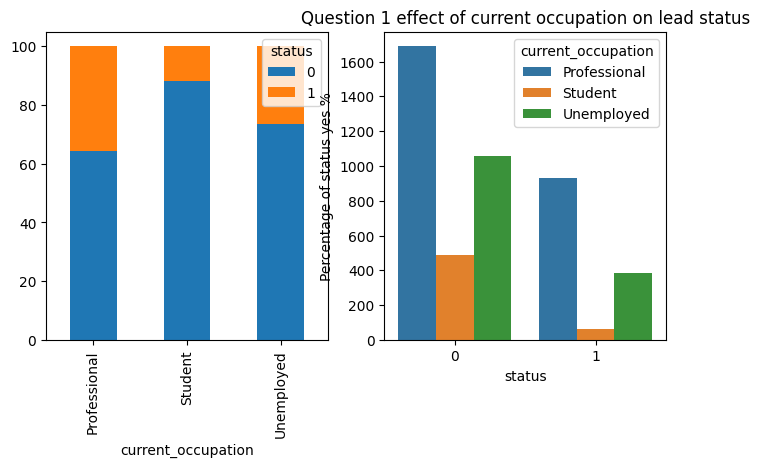

In [ ]:
#Question 1
print(df['current_occupation'].value_counts())

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,6))#(16,8)

(pd.crosstab(df['current_occupation'],df['status'],normalize='index')*100).plot(ax=axes[0], kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage of status yes %')

sns.countplot(ax=axes[1], data=df, x='status', hue='current_occupation').set(title='Question 1 effect of current occupation on lead status');
#sns.boxplot(ax=axes[0, 0], data=df, x='age',color='green');

#print('\n Professional as option for current_occupation:')
Newdf_Professional_currentOccupation=df.loc[df['current_occupation'] =='Professional'];
#print('Status value counts for Professional is: ',Newdf_Professional_currentOccupation['status'].value_counts())

ConteoProfessional_currentOccupation = df['current_occupation'].eq('Professional').sum()
#print('The count of Professional, from current_occupation is:',ConteoProfessional_currentOccupation)
ConteoYes_Professional_currentOccupation = Newdf_Professional_currentOccupation['status'].eq(1).sum()
percent_succes_Professional_currentOccupation = 100*ConteoYes_Professional_currentOccupation/ConteoProfessional_currentOccupation

print('\n Professional, succes count is:',ConteoYes_Professional_currentOccupation)
print('     Then, the success percentage:',percent_succes_Professional_currentOccupation)

#print('Unemployed as option for current_occupation:')
Newdf_Unemployed_currentOccupation=df.loc[df['current_occupation'] =='Unemployed'];
#print('Status value counts for Unemployed is: ',Newdf_Unemployed_currentOccupation['status'].value_counts())

ConteoUnemployed_currentOccupation = df['current_occupation'].eq('Unemployed').sum()
#print('The count of Unemployed, from current_occupation is:',ConteoUnemployed_currentOccupation)
ConteoYes_Unemployed_currentOccupation = Newdf_Unemployed_currentOccupation['status'].eq(1).sum()
percent_succes_Unemployed_currentOccupation = 100*ConteoYes_Unemployed_currentOccupation/ConteoUnemployed_currentOccupation

print('Unemployed, the succes count is:',ConteoYes_Unemployed_currentOccupation)
print('    Then, the success percentage:',percent_succes_Unemployed_currentOccupation)

#print('\n Student as option for current_occupation:')
Newdf_Student_currentOccupation=df.loc[df['current_occupation'] =='Student'];
#print('Status value counts for Student is: ',Newdf_Student_currentOccupation['status'].value_counts())

ConteoStudent_currentOccupation = df['current_occupation'].eq('Student').sum()
#print('The count of Student, from current_occupation is:',ConteoStudent_currentOccupation)
ConteoYes_Student_currentOccupation = Newdf_Student_currentOccupation['status'].eq(1).sum()
percent_succes_Student_currentOccupation = 100*ConteoYes_Student_currentOccupation/ConteoStudent_currentOccupation

print('From Student, the succes count is:',ConteoYes_Student_currentOccupation)
print('     Then, the success percentage:',percent_succes_Student_currentOccupation)

**Conclusion: from the 'current_occupation' feature**:

- the best conversion rate is attained by Professional, with 35.5%
- the conversion rate for unemployed is 26.6%
- conversion rate for student is 11.7%

## Second question
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64 

Website: the succes count is: 1159
  Then, the success percentage: 45.594020456333595
Mobile App: the succes count and succes percentage is: 218  And 10.531400966183575


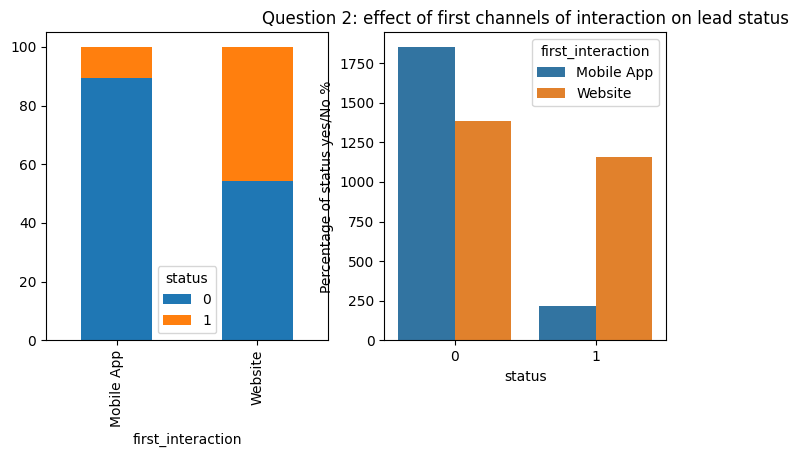

In [ ]:
#codequestion 2
#print('First interaction')

print(df['first_interaction'].value_counts(),'\n')

Newdf_Website_firstInteraction=df.loc[df['first_interaction'] =='Website'];
#print('Status value counts for Website is: ',Newdf_Website_firstInteraction['status'].value_counts())
ConteoWebsite_firstInteraction = df['first_interaction'].eq('Website').sum()
#print('The count of Website, from first_interaction is:',ConteoWebsite_firstInteraction)
ConteoYes_Website_firstInteraction = Newdf_Website_firstInteraction['status'].eq(1).sum()
percent_succes_Website_firstInteraction = 100*ConteoYes_Website_firstInteraction/ConteoWebsite_firstInteraction

print('Website: the succes count is:',ConteoYes_Website_firstInteraction)
print('  Then, the success percentage:',percent_succes_Website_firstInteraction)

#print('Mobile App option for first_interaction:')
Newdf_MobileApp_firstInteraction=df.loc[df['first_interaction'] =='Mobile App'];
#print('Status value counts for MobileApp is: ',Newdf_MobileApp_firstInteraction['status'].value_counts())

ConteoMobileApp_firstInteraction = df['first_interaction'].eq('Mobile App').sum()
#print('The count of MobileApp, from first_interaction is:',ConteoMobileApp_firstInteraction)
ConteoYes_MobileApp_firstInteraction = Newdf_MobileApp_firstInteraction['status'].eq(1).sum()
percent_succes_MobileApp_firstInteraction = 100*ConteoYes_MobileApp_firstInteraction/ConteoMobileApp_firstInteraction

print('Mobile App: the succes count and succes percentage is:',ConteoYes_MobileApp_firstInteraction, ' And',percent_succes_MobileApp_firstInteraction)
#print('  Then, the success percentage:',percent_succes_MobileApp_firstInteraction)

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,6))#(16,8)

(pd.crosstab(df['first_interaction'],df['status'],normalize='index')*100).plot(ax=axes[0], kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage of status yes/No %')

sns.countplot(ax=axes[1], data=df, x='status', hue='first_interaction').set(title='Question 2: effect of first channels of interaction on lead status');
#sns.countplot(data=df, x='status', hue='first_interaction').set(title='Quesion 2 effect of first channels of interaction on lead status');

**Conclusion: From the 'first_interaction' feature**:
- the best conversion rate is attained by Website, with 45.6% chance
- the conversion rate for Mobile app is 10.5%

## Third question
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64

 Email, the succes count is: 691
   Then, the success percentage: 30.333625987708515
Phone, the succes count is: 263
   Then, the success percentage: 21.312803889789304
Website, the succes count is: 423
   Then, the success percentage: 38.45454545454545


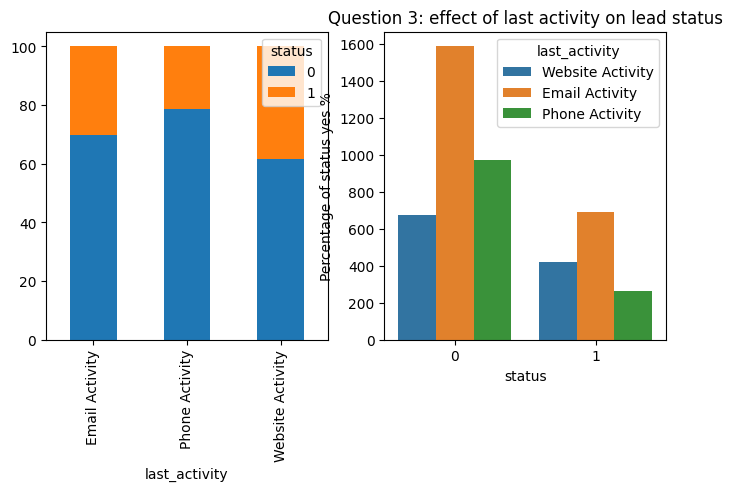

In [ ]:
#code question 3

print(df['last_activity'].value_counts())

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,6))#(16,8)

(pd.crosstab(df['last_activity'],df['status'],normalize='index')*100).plot(ax=axes[0], kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage of status yes %')

sns.countplot(ax=axes[1], data=df, x='status', hue='last_activity').set(title='Question 3: effect of last activity on lead status');

#sns.countplot(data=df, x='status', hue='last_activity').set(title='Question 3 effect of last activity on lead status');

#print('Email option for last_activity:')
Newdf_Email_lastActivity=df.loc[df['last_activity'] =='Email Activity'];
#print('Status value counts for Email is: ',Newdf_Email_lastActivity['status'].value_counts())

ConteoEmail_lastActivity = df['last_activity'].eq('Email Activity').sum()
#print('The count of Email, from last_activity is:',ConteoEmail_lastActivity)
ConteoYes_Email_lastActivity = Newdf_Email_lastActivity['status'].eq(1).sum()
percent_succes_Email_lastActivity = 100*ConteoYes_Email_lastActivity/ConteoEmail_lastActivity

print('\n Email, the succes count is:',ConteoYes_Email_lastActivity)
print('   Then, the success percentage:',percent_succes_Email_lastActivity)

#print('Phone option for last_activity:')
Newdf_Phone_lastActivity=df.loc[df['last_activity'] =='Phone Activity'];
#print('Status value counts for Phone is: ',Newdf_Phone_lastActivity['status'].value_counts())

ConteoPhone_lastActivity = df['last_activity'].eq('Phone Activity').sum()
#print('The count of Phone, from last_activity is:',ConteoPhone_lastActivity)
ConteoYes_Phone_lastActivity = Newdf_Phone_lastActivity['status'].eq(1).sum()
percent_succes_Phone_lastActivity = 100*ConteoYes_Phone_lastActivity/ConteoPhone_lastActivity

print('Phone, the succes count is:',ConteoYes_Phone_lastActivity)
print('   Then, the success percentage:',percent_succes_Phone_lastActivity)

#print('Website option for last_activity:')
Newdf_Website_lastActivity=df.loc[df['last_activity'] =='Website Activity'];
#print('Status value counts for Website is: ',Newdf_Website_lastActivity['status'].value_counts())

ConteoWebsite_lastActivity = df['last_activity'].eq('Website Activity').sum()
#print('The count of Website, from last_activity is:',ConteoWebsite_lastActivity)
ConteoYes_Website_lastActivity = Newdf_Website_lastActivity['status'].eq(1).sum()
percent_succes_Website_lastActivity = 100*ConteoYes_Website_lastActivity/ConteoWebsite_lastActivity

print('Website, the succes count is:',ConteoYes_Website_lastActivity)
print('   Then, the success percentage:',percent_succes_Website_lastActivity)




**Conclusion: From the 'last activity' feature**:
- the best conversion rate is attained by Website, with 38.5%
- the conversion rate for Email is 30.3%
- the conversion rate for Phone is 21.3%

## Fourth question
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

**Conversion rate for print_media_type1**

In [ ]:
df['print_media_type1'].value_counts()

print_media_type1
No     4115
Yes     497
Name: count, dtype: int64

In [ ]:
Newdf_YesPrintMediaType1=df.loc[df['print_media_type1'] =='Yes'];# A new DataFrame (Newdf)) is created, in which print_media_type1 = Yes
Newdf_YesPrintMediaType1['status'].value_counts()

status
0    338
1    159
Name: count, dtype: int64

Then, the conversion rate for print media 1 is:\

   100 ( SUM 'Paid customer') / (SUM 'Yes Print media 1')

Substituting the above values, gives the conversion rate for print media 1:\
   Conversion rate = 100*(159) / 497 = 31.99 per cent

**Conversion rate for print_media_type2**

In [ ]:
df['print_media_type2'].value_counts()

print_media_type2
No     4379
Yes     233
Name: count, dtype: int64

In [ ]:
Newdf_YesPrintMediaType2=df.loc[df['print_media_type2'] =='Yes'];# A new DataFrame (Newdf)) is created, in which print_media_type1 = Yes
Newdf_YesPrintMediaType2['status'].value_counts()

status
0    158
1     75
Name: count, dtype: int64

Then, the conversion rate for print media 2 is:\

   100 ( SUM 'Paid customer') / (SUM 'Yes Print media 2')

Substituting the above values, gives the conversion rate for print media 2:\
   Conversion rate = 100*(75) / 233 =  32.19 per cent

**Conversion rate for digital_media**

In [ ]:
df['digital_media'].value_counts()

digital_media
No     4085
Yes     527
Name: count, dtype: int64

In [ ]:
Newdf_YesDigitalMedia=df.loc[df['digital_media'] =='Yes'];# A new DataFrame (Newdf)) is created, in which digital_media = Yes
Newdf_YesDigitalMedia['status'].value_counts()

status
0    359
1    168
Name: count, dtype: int64


Then, the conversion rate for digital media is:\

100 ( SUM 'Paid customer') / (SUM 'Yes Digital media')

Substituting the above values, gives the conversion rate for digital media:\
Conversion rate = 100*(168) / 527 =  31.88 per cent

**Conversion rate for educational_channels**

In [ ]:
df['educational_channels'].value_counts()

educational_channels
No     3907
Yes     705
Name: count, dtype: int64

In [ ]:
Newdf_YesEducationalChannels=df.loc[df['educational_channels'] =='Yes'];# A new DataFrame (Newdf)) is created, in which educational_channels = Yes
Newdf_YesEducationalChannels['status'].value_counts()

status
0    508
1    197
Name: count, dtype: int64

Then, the conversion rate for educational_channels is:\

100 ( SUM 'Paid customer') / (SUM 'Yes educational_channels')

Substituting the above values, gives the conversion rate for educational_channels:\
Conversion rate = 100*(197) / 705 =  27.94 per cent

**Conversion rate for referral**

In [ ]:
df['referral'].value_counts()

referral
No     4519
Yes      93
Name: count, dtype: int64

In [ ]:
Newdf_YesReferral=df.loc[df['referral'] =='Yes'];# A new DataFrame (Newdf)) is created, in which referral = Yes
Newdf_YesReferral['status'].value_counts()

status
1    63
0    30
Name: count, dtype: int64

Then, the conversion rate for referral is:\

100 ( SUM 'Paid customer') / (SUM 'Yes referral')

Substituting the above values, gives the conversion rate for referral:\
Conversion rate = 100*(30) / 93 = 32.26 per cent

**Final answer: from the channels, eg print media, digital media, referrals, etc, the higest conversion rate is attained by referral**

## Fifth question

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
High (profile Completed), the succes count is: 946
    Then, the success percentage: 41.78445229681979
Medium (profile Completed), the succes count is: 423
    Then, the success percentage: 18.87550200803213
Low (profile Completed), the succes count is: 8
    the success percentage: 7.4766355140186915


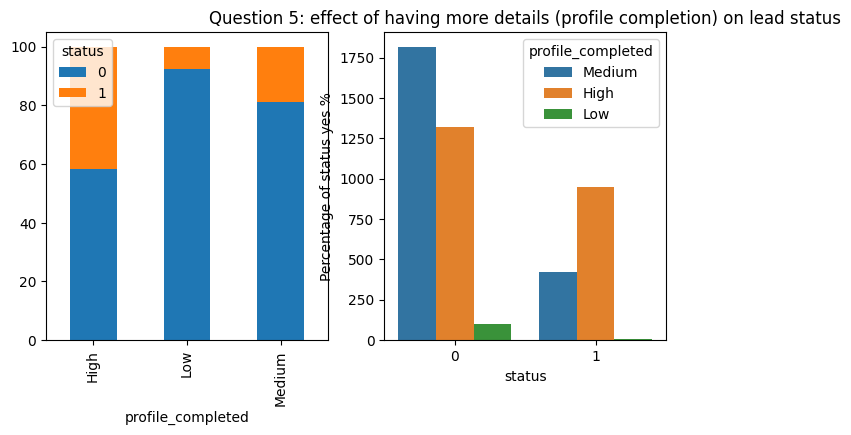

In [ ]:
#code fifth

print(df['profile_completed'].value_counts())

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,6))#(16,8)

(pd.crosstab(df['profile_completed'],df['status'],normalize='index')*100).plot(ax=axes[0], kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage of status yes %')

sns.countplot(ax=axes[1], data=df, x='status', hue='profile_completed').set(title='Question 5: effect of having more details (profile completion) on lead status');

#sns.countplot(data=df, x='status', hue='profile_completed').set(title='Question 5 effect of having more details (profile completion) on lead status');

#print('High as option for profile_completed:')
Newdf_High_profileCompleted=df.loc[df['profile_completed'] =='High'];
#print('Status value counts for High is: ',Newdf_High_profileCompleted['status'].value_counts())

ConteoHigh_profileCompleted = df['profile_completed'].eq('High').sum()
#print('The High count, from profile completed is:',ConteoHigh_profileCompleted)
ConteoYes_High_profileCompleted = Newdf_High_profileCompleted['status'].eq(1).sum()
percent_succes_HighProfilecompleted = 100*ConteoYes_High_profileCompleted/ConteoHigh_profileCompleted

print('High (profile Completed), the succes count is:',ConteoYes_High_profileCompleted)
print('    Then, the success percentage:',percent_succes_HighProfilecompleted)

#print('Medium as option for profile completed:')
Newdf_Medium_profileCompleted=df.loc[df['profile_completed'] =='Medium'];
#print('Status value counts for Medium is: ',Newdf_Medium_profileCompleted['status'].value_counts())

ConteoMedium_profileCompleted = df['profile_completed'].eq('Medium').sum()
#print('The Medium count, from profile completed is:',ConteoMedium_profileCompleted)
ConteoYes_Medium_profileCompleted = Newdf_Medium_profileCompleted['status'].eq(1).sum()
percent_succes_MediumProfilecompleted = 100*ConteoYes_Medium_profileCompleted/ConteoMedium_profileCompleted

print('Medium (profile Completed), the succes count is:',ConteoYes_Medium_profileCompleted)
print('    Then, the success percentage:',percent_succes_MediumProfilecompleted)

#print('Low as option for profile completed:')
Newdf_Low_profileCompleted=df.loc[df['profile_completed'] =='Low'];
#print('Status value counts for Low is: ',Newdf_Low_profileCompleted['status'].value_counts())

ConteoLow_profileCompleted = df['profile_completed'].eq('Low').sum()
#print('The Low count, from profile completed is:',ConteoLow_profileCompleted)
ConteoYes_Low_profileCompleted = Newdf_Low_profileCompleted['status'].eq(1).sum()
percent_succes_LowProfilecompleted = 100*ConteoYes_Low_profileCompleted/ConteoLow_profileCompleted

print('Low (profile Completed), the succes count is:',ConteoYes_Low_profileCompleted)
print('    the success percentage:',percent_succes_LowProfilecompleted)

**Conclusion:**
- the answer is yes: the highest conversion rate is attained for High completion of profile with 41.8%;
- In addition, Medium completion exhibits conversion rate of 18.9%, and Low completion exhibits conversion rate of 7.5%

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#Observation:
- Decision trees and random forests are not sensitive to the magnitude of variables, so that scaling is not necessary. Then, we don't perform scaling.

**Outlier detection:**

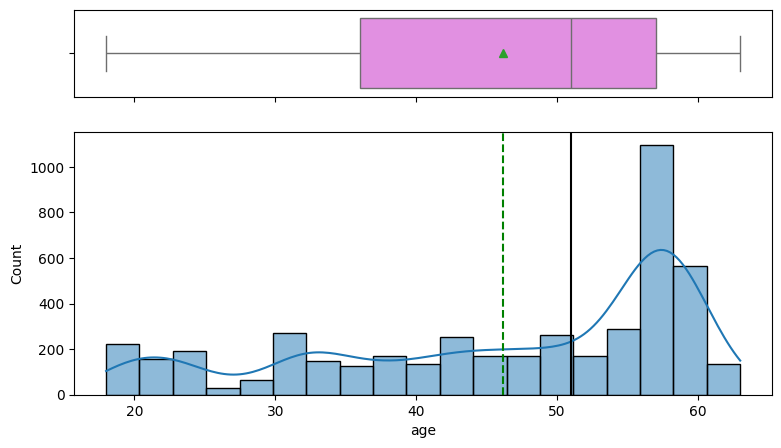

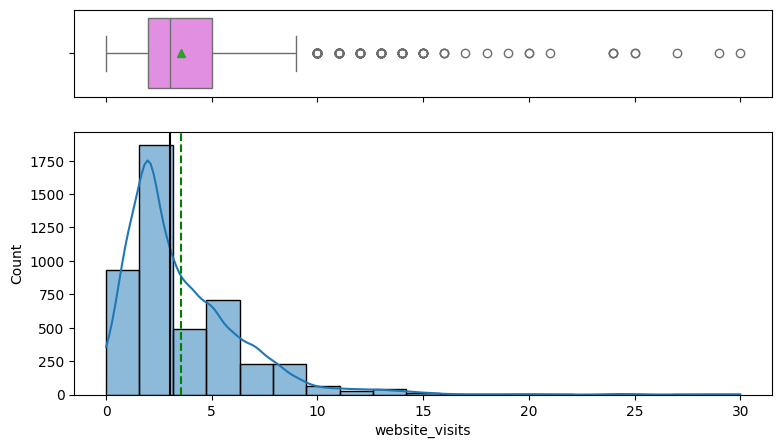

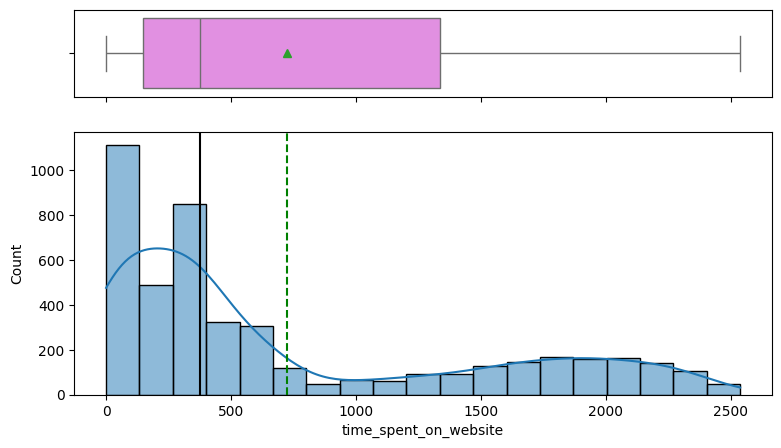

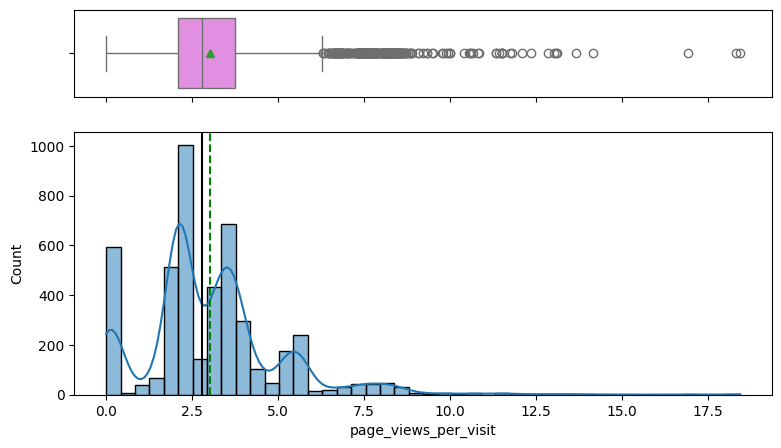

In [ ]:
histogram_boxplot(df, "age", kde = True, bins = 19)

histogram_boxplot(df, "website_visits", kde = True, bins = 19)

histogram_boxplot(df, "time_spent_on_website", kde = True, bins = 19)

histogram_boxplot(df, "page_views_per_visit", kde = True, bins = 44)

# Observations:
From the numerical variables (age, website_visits, time_spent_on_website, page_views_per_visit), only website_visits and page_views_per_visit have outiers:
- website_visits has outliers on the right hand side: few leads have an overhigh number of visits to the website, higher than 9.
- page_views_per_visit has outliers on the right hand side:
 few leads have an overhigh number of views per visit, higher than 7.0.

**Nonlinear transformation of features by using log**\

In [ ]:
def funlogi(s):
    return np.log(s+0.1)

<Axes: xlabel='Log(page_views_per_visit)', ylabel='Density'>

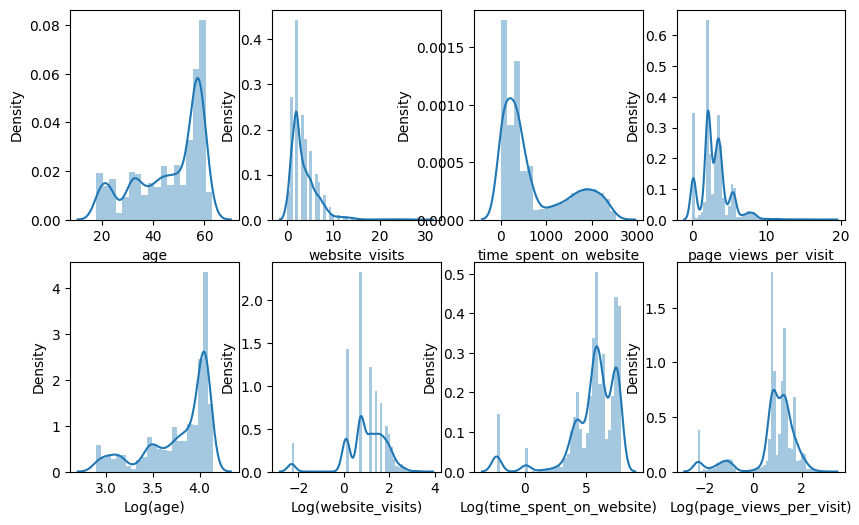

In [ ]:
fig, axes = plt.subplots(2, 4, sharex=False, figsize=(10,6))#(16,8)

sns.distplot(df['age'], axlabel = 'age', ax=axes[0, 0]) #sns.distplot(np.log(df['age']), axlabel = 'Log(age)', ax=axes[0, 1])
df['logi_age'] = np.log(df['age'])
sns.distplot(df['logi_age'], axlabel = 'Log(age)', ax=axes[1, 0])

sns.distplot(df['website_visits'], axlabel = 'website_visits', ax=axes[0, 1])
df['logi_website_visits'] = df['website_visits'].apply(funlogi)
sns.distplot(df['logi_website_visits'], axlabel = 'Log(website_visits)', ax=axes[1, 1])

sns.distplot(df['time_spent_on_website'], axlabel = 'time_spent_on_website', ax=axes[0, 2])
df['logi_time_spent_on_website'] = df['time_spent_on_website'].apply(funlogi)
sns.distplot(df['logi_time_spent_on_website'], axlabel = 'Log(time_spent_on_website)', ax=axes[1, 2])

sns.distplot(df['page_views_per_visit'], axlabel = 'page_views_per_visit', ax=axes[0, 3])
df['logi_page_views_per_visit'] = df['page_views_per_visit'].apply(funlogi)
sns.distplot(df['logi_page_views_per_visit'],axlabel = 'Log(page_views_per_visit)', ax=axes[1, 3])

# Observations:
- I will not use nonlinear transformation of variables, because the models (decision tree and random forest) have achieved a good performance without nonlinear transformation.
- However, the remainder of the nonlinear transformation analysis is provided in the additional content.

## EDA

- It is a good idea to explore the data once again after manipulating it.

**Dropping unnecessary columns** \
- We have the new features: logi_age, logi_website_visits, logi_time_spent_on_website, logi_page_views_per_visit
- We need to get rid of them, and also we need to get rid of the ID column.

In [ ]:
df.head()

ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   
3  Website Activity                No                No            No   
4    Email Activity                No                No            No   

  educational_channels referral  status  logi_age  logi_website_visits  \
0                   No       No       1  4.043051             1.960095   
1                  Yes       No       0  4.025352             0.741937   
2                   No       No       0  3.951244             1.131402   
3                   No       No       1  3.970292             1.410987   
4                   No       No       0  3.135494             1.410987   

   logi_time_spent_on_website  logi_page_views_per_visit  
0                    7.401903                   0.673455  
1                    4.420045                  -0.867501  
2                    5.799396                  -1.748700  
3                    6.140100                   0.768718  
4                    6.397096                   2.834037

In [ ]:
df_forModel = df.copy() #Esto crea una copia
df_forModel.head()

ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   
3  Website Activity                No                No            No   
4    Email Activity                No                No            No   

  educational_channels referral  status  logi_age  logi_website_visits  \
0                   No       No       1  4.043051             1.960095   
1                  Yes       No       0  4.025352             0.741937   
2                   No       No       0  3.951244             1.131402   
3                   No       No       1  3.970292             1.410987   
4                   No       No       0  3.135494             1.410987   

   logi_time_spent_on_website  logi_page_views_per_visit  
0                    7.401903                   0.673455  
1                    4.420045                  -0.867501  
2                    5.799396                  -1.748700  
3                    6.140100                   0.768718  
4                    6.397096                   2.834037

In [ ]:
df_forModel.drop(['ID','logi_age','logi_website_visits','logi_time_spent_on_website','logi_page_views_per_visit'], axis=1, inplace=True)

#df_forModel.drop(['ID','age','website_visits','time_spent_on_website','page_views_per_visit'], axis=1, inplace=True)
df_forModel.head()

age current_occupation first_interaction profile_completed  website_visits  \
0   57         Unemployed           Website              High               7   
1   56       Professional        Mobile App            Medium               2   
2   52       Professional           Website            Medium               3   
3   53         Unemployed           Website              High               4   
4   23            Student           Website              High               4   

   time_spent_on_website  page_views_per_visit     last_activity  \
0                   1639                 1.861  Website Activity   
1                     83                 0.320  Website Activity   
2                    330                 0.074  Website Activity   
3                    464                 2.057  Website Activity   
4                    600                16.914    Email Activity   

  print_media_type1 print_media_type2 digital_media educational_channels  \
0               Yes                No           Yes                   No   
1                No                No            No                  Yes   
2                No                No           Yes                   No   
3                No                No            No                   No   
4                No                No            No                   No   

  referral  status  
0       No       1  
1       No       0  
2       No       0  
3       No       1  
4       No       0

In [ ]:
df_forModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [ ]:
df_forModel.isna().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [ ]:
df_forModel.describe(include='all').T

count unique             top  freq        mean  \
age                    4612.0    NaN             NaN   NaN   46.201214   
current_occupation       4612      3    Professional  2616         NaN   
first_interaction        4612      2         Website  2542         NaN   
profile_completed        4612      3            High  2264         NaN   
website_visits         4612.0    NaN             NaN   NaN    3.566782   
time_spent_on_website  4612.0    NaN             NaN   NaN  724.011275   
page_views_per_visit   4612.0    NaN             NaN   NaN    3.026126   
last_activity            4612      3  Email Activity  2278         NaN   
print_media_type1        4612      2              No  4115         NaN   
print_media_type2        4612      2              No  4379         NaN   
digital_media            4612      2              No  4085         NaN   
educational_channels     4612      2              No  3907         NaN   
referral                 4612      2              No  4519         NaN   
status                 4612.0    NaN             NaN   NaN    0.298569   

                              std   min      25%    50%      75%     max  
age                     13.161454  18.0     36.0   51.0     57.0    63.0  
current_occupation            NaN   NaN      NaN    NaN      NaN     NaN  
first_interaction             NaN   NaN      NaN    NaN      NaN     NaN  
profile_completed             NaN   NaN      NaN    NaN      NaN     NaN  
website_visits           2.829134   0.0      2.0    3.0      5.0    30.0  
time_spent_on_website  743.828683   0.0   148.75  376.0  1336.75  2537.0  
page_views_per_visit     1.968125   0.0  2.07775  2.792  3.75625  18.434  
last_activity                 NaN   NaN      NaN    NaN      NaN     NaN  
print_media_type1             NaN   NaN      NaN    NaN      NaN     NaN  
print_media_type2             NaN   NaN      NaN    NaN      NaN     NaN  
digital_media                 NaN   NaN      NaN    NaN      NaN     NaN  
educational_channels          NaN   NaN      NaN    NaN      NaN     NaN  
referral                      NaN   NaN      NaN    NaN      NaN     NaN  
status                    0.45768   0.0      0.0    0.0      1.0     1.0

**Creating Dummy variables for the categorical columns:** \
 drop_first=True is used to avoid redundant variables

In [ ]:
NewdfDummies = pd.get_dummies(
    df_forModel,
    columns = df_forModel.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

## Creating dummy variables for the categorical columns
## drop_first=True is used to avoid redundant variables

In [ ]:
NewdfDummies.head()

age  website_visits  time_spent_on_website  page_views_per_visit  status  \
0   57               7                   1639                 1.861       1   
1   56               2                     83                 0.320       0   
2   52               3                    330                 0.074       0   
3   53               4                    464                 2.057       1   
4   23               4                    600                16.914       0   

   current_occupation_Student  current_occupation_Unemployed  \
0                       False                           True   
1                       False                          False   
2                       False                          False   
3                       False                           True   
4                        True                          False   

   first_interaction_Website  profile_completed_Low  profile_completed_Medium  \
0                       True                  False                     False   
1                      False                  False                      True   
2                       True                  False                      True   
3                       True                  False                     False   
4                       True                  False                     False   

   last_activity_Phone Activity  last_activity_Website Activity  \
0                         False                            True   
1                         False                            True   
2                         False                            True   
3                         False                            True   
4                         False                           False   

   print_media_type1_Yes  print_media_type2_Yes  digital_media_Yes  \
0                   True                  False               True   
1                  False                  False              False   
2                  False                  False               True   
3                  False                  False              False   
4                  False                  False              False   

   educational_channels_Yes  referral_Yes  
0                     False         False  
1                      True         False  
2                     False         False  
3                     False         False  
4                     False         False

Separating independent variables and the target variable:

In [ ]:
Y = NewdfDummies['status']
X = NewdfDummies.drop(columns = ["status"], axis=1)

In [ ]:
X.head()

age  website_visits  time_spent_on_website  page_views_per_visit  \
0   57               7                   1639                 1.861   
1   56               2                     83                 0.320   
2   52               3                    330                 0.074   
3   53               4                    464                 2.057   
4   23               4                    600                16.914   

   current_occupation_Student  current_occupation_Unemployed  \
0                       False                           True   
1                       False                          False   
2                       False                          False   
3                       False                           True   
4                        True                          False   

   first_interaction_Website  profile_completed_Low  profile_completed_Medium  \
0                       True                  False                     False   
1                      False                  False                      True   
2                       True                  False                      True   
3                       True                  False                     False   
4                       True                  False                     False   

   last_activity_Phone Activity  last_activity_Website Activity  \
0                         False                            True   
1                         False                            True   
2                         False                            True   
3                         False                            True   
4                         False                           False   

   print_media_type1_Yes  print_media_type2_Yes  digital_media_Yes  \
0                   True                  False               True   
1                  False                  False              False   
2                  False                  False               True   
3                  False                  False              False   
4                  False                  False              False   

   educational_channels_Yes  referral_Yes  
0                     False         False  
1                      True         False  
2                     False         False  
3                     False         False  
4                     False         False

In [ ]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: status, dtype: int64

In [ ]:
Y.tail()

4607    0
4608    0
4609    1
4610    0
4611    0
Name: status, dtype: int64

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4612 entries, 0 to 4611
Series name: status
Non-Null Count  Dtype
--------------  -----
4612 non-null   int64
dtypes: int64(1)
memory usage: 36.2 KB


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   current_occupation_Student      4612 non-null   bool   
 5   current_occupation_Unemployed   4612 non-null   bool   
 6   first_interaction_Website       4612 non-null   bool   
 7   profile_completed_Low           4612 non-null   bool   
 8   profile_completed_Medium        4612 non-null   bool   
 9   last_activity_Phone Activity    4612 non-null   bool   
 10  last_activity_Website Activity  4612 non-null   bool   
 11  print_media_type1_Yes           4612 non-null   bool   
 12  print_media_type2_Yes           46

# Splitting the dataset into train and test datasets:
we consider 20% of data for test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 1)

In [ ]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3689, 16)
Shape of test set :  (923, 16)


# Model evaluation criterion

- We will use the confusion matrix for classification evaluation. It includes accuracy, precision and recall. To this end, we define the function 'metrics_score'.

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not', 'Yes'], yticklabels=['Not', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building a Decision Tree model**

- We will use the confusion matrix for classification evaluation. We use the function 'metrics_score' defined before.
- Decision trees and random forests are not sensitive to the magnitude of variables, so that scaling is not necessary. Then, we don't perform scaling.
- class_weight: I consider that accurate prediction is important for both paid customer (status = 1) and unpaid customer (status = 0). Then, I will not specify class_weight, so that the program gives equal weight to both paid customer and unpaid customer.
- In analizing the confusion matrix, I consider that both precision and recall are equally important.
- I will use the DecisionTreeClassifier function.

In [ ]:
## **Decision Tree**
# Decision Tree Regressor
dt_classifier = DecisionTreeClassifier(random_state = 1)
#dt_regressor = DecisionTreeRegressor(random_state = 1)

In [ ]:
# Fitting the model
dt_classifier.fit(x_train, y_train)
dtclassifiervariable = dt_classifier.fit(x_train, y_train)
print('The depth of the tree is:',dtclassifiervariable.tree_.max_depth)
#dt_regressor.fit(x_train, y_train)

The depth of the tree is: 28


Now, we evaluate the model on the train set and on the test set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



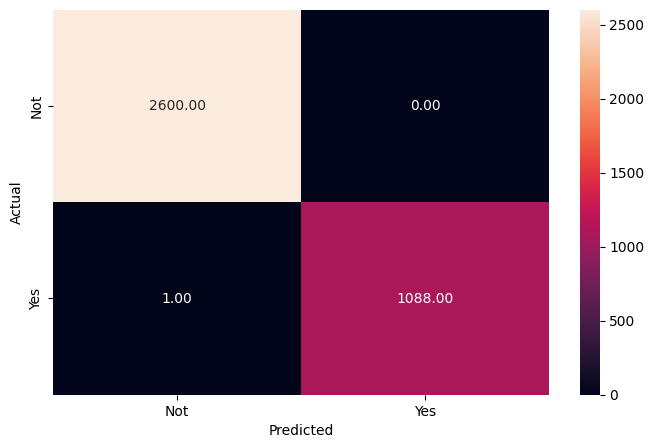

In [ ]:
# Model Performance on the train data
y_pred_train_dt = dt_classifier.predict(x_train)
metrics_score(y_train, y_pred_train_dt)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       635
           1       0.71      0.70      0.71       288

    accuracy                           0.82       923
   macro avg       0.79      0.79      0.79       923
weighted avg       0.82      0.82      0.82       923



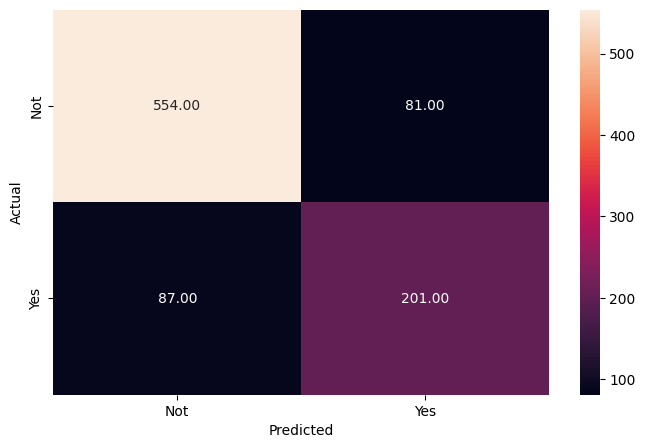

In [ ]:
# Model Performance on the test data
y_pred_test_dt = dt_classifier.predict(x_test)
metrics_score(y_test, y_pred_test_dt)

#dt_regressor_perf_train = model_performance_regression(dt_classifier, x_train, y_train)
##dt_regressor_perf_train = model_performance_regression(dt_regressor, x_train, y_train)
#print('The performance of the decision tree on the train dataset is:\n', dt_regressor_perf_train)

## Do we need to prune the tree?

# Observations:
 - B𝕪 comparing the accuracy between train and test data, one can see a precision-recall of 1-1 for train data, and of 0.71-0.70 for test data. It is a high difference, so that there is overfitting.
 - Then, we are going to prune the tree.

Now, we limit the max_depth of the tree in order to reduce overfitting:

In [ ]:
dt_classifier_pruned = DecisionTreeClassifier(random_state = 1, max_depth =10)

dt_classifier_pruned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

Metrics of pruned (limited mx depth) decision tree for training data:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2600
           1       0.87      0.87      0.87      1089

    accuracy                           0.92      3689
   macro avg       0.91      0.91      0.91      3689
weighted avg       0.92      0.92      0.92      3689



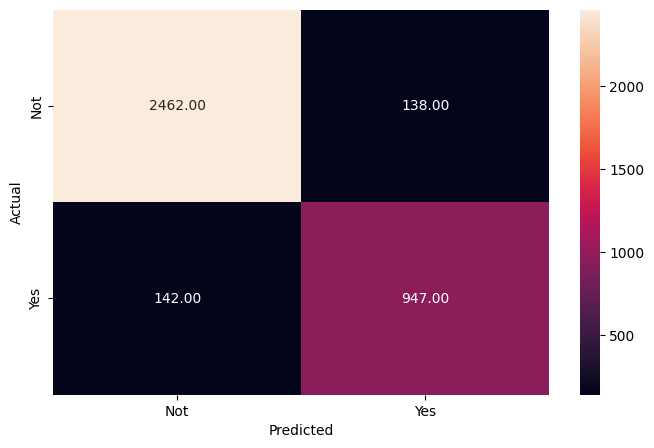

In [ ]:
y_pred_train_dt_pruned = dt_classifier_pruned.predict(x_train)
metrics_score(y_train, y_pred_train_dt_pruned)

#dt_regressor_pruned_perf_train = model_performance_regression(dt_classifier_pruned, x_train, y_train)
#print('Decision tree performance on the train dataset is: \n', dt_regressor_pruned_perf_train)

Metrics of pruned (limited mx depth) decision tree for test data:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       635
           1       0.75      0.75      0.75       288

    accuracy                           0.85       923
   macro avg       0.82      0.82      0.82       923
weighted avg       0.84      0.85      0.84       923



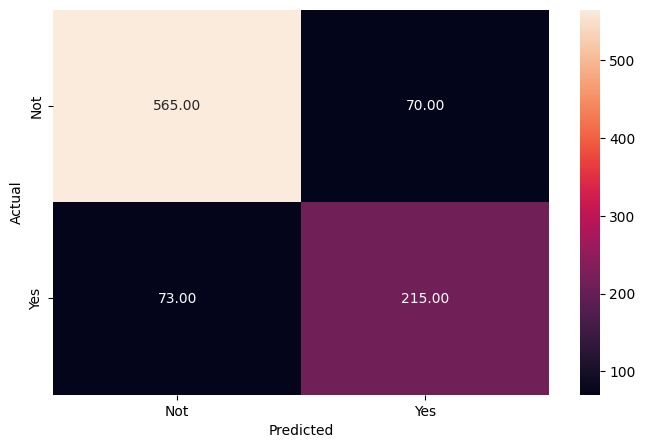

In [ ]:
y_pred_test_dt_pruned = dt_classifier_pruned.predict(x_test)
metrics_score(y_test, y_pred_test_dt_pruned)

# Observation:
- We can see that as a result of limiting the max_depth to 10,\
we obtain a lower differene between train and test:\
   -precision-recall for train data: 0.87-0.87 \
   -precision-recall for test data: 0.75-0.75 \
- These values are relatively closer, so that the used limitation of max_depth was useful to certain level.
- However, we will later use random forest and the corresponding tuning, as these are better ways to avoid ovefitting.

# Plot the feature importance:

<Axes: xlabel='Importance', ylabel='None'>

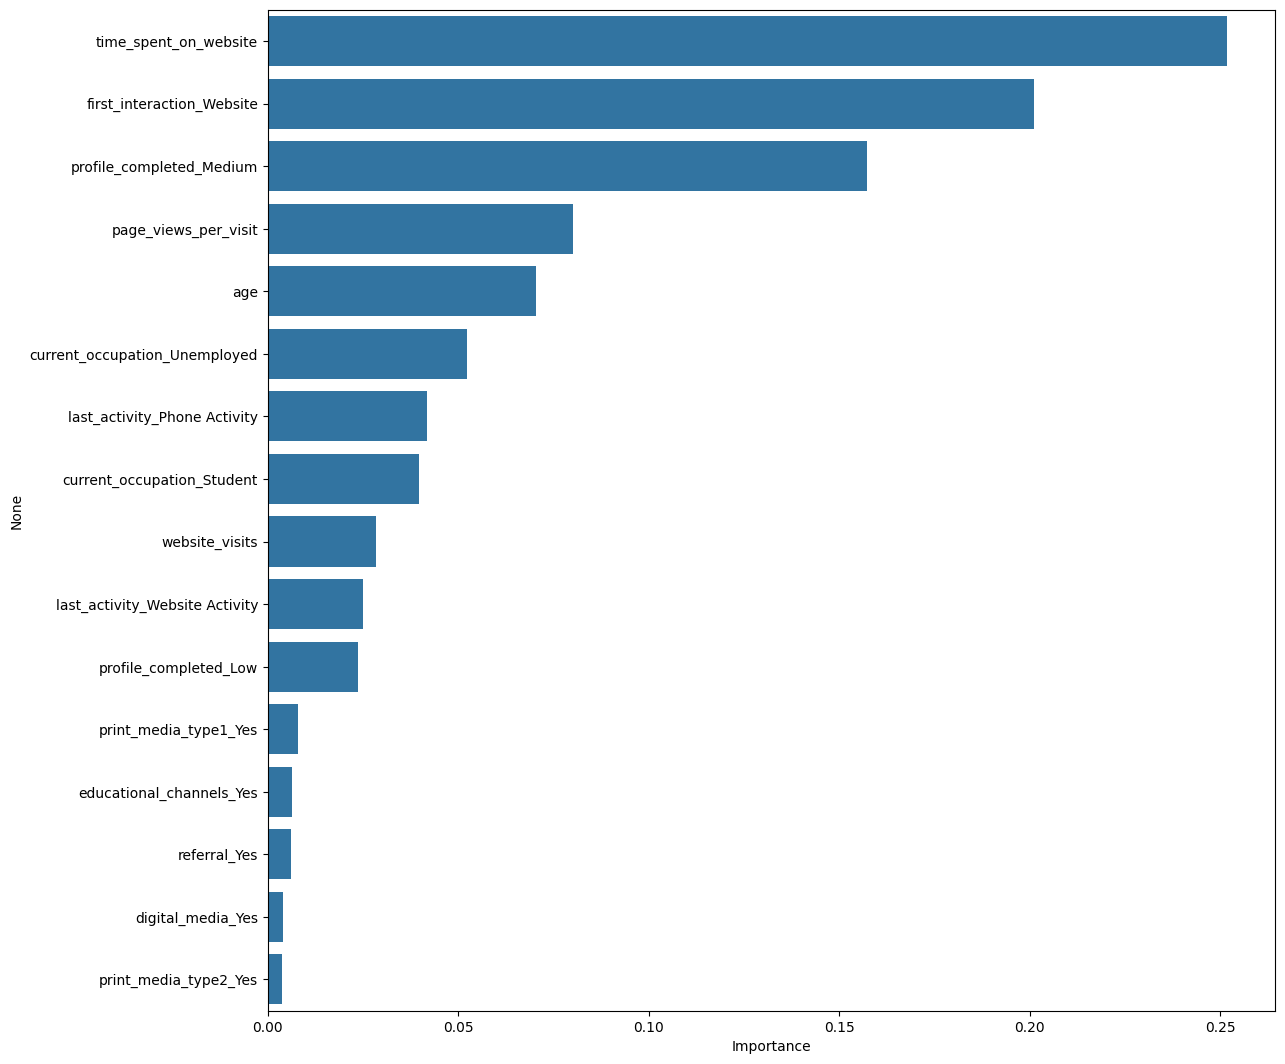

In [ ]:
importances = dt_classifier_pruned.feature_importances_
columns = X.columns
#print(columns)
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**
- According to the Decision tree, time_spent_on_website is the most important feature, followed by first_interaction_Website, profile_completed_Medium, page_views_per_visit, age.
- This might signify that the leads with higher possibility of becoming paid custormer, spend more time on website, their first interaction is through website, have a Medium level of profile completion, and certain age range.

**Plotting of the decision tree:**\
we are only visualizing the tree up to max_depth = 4.

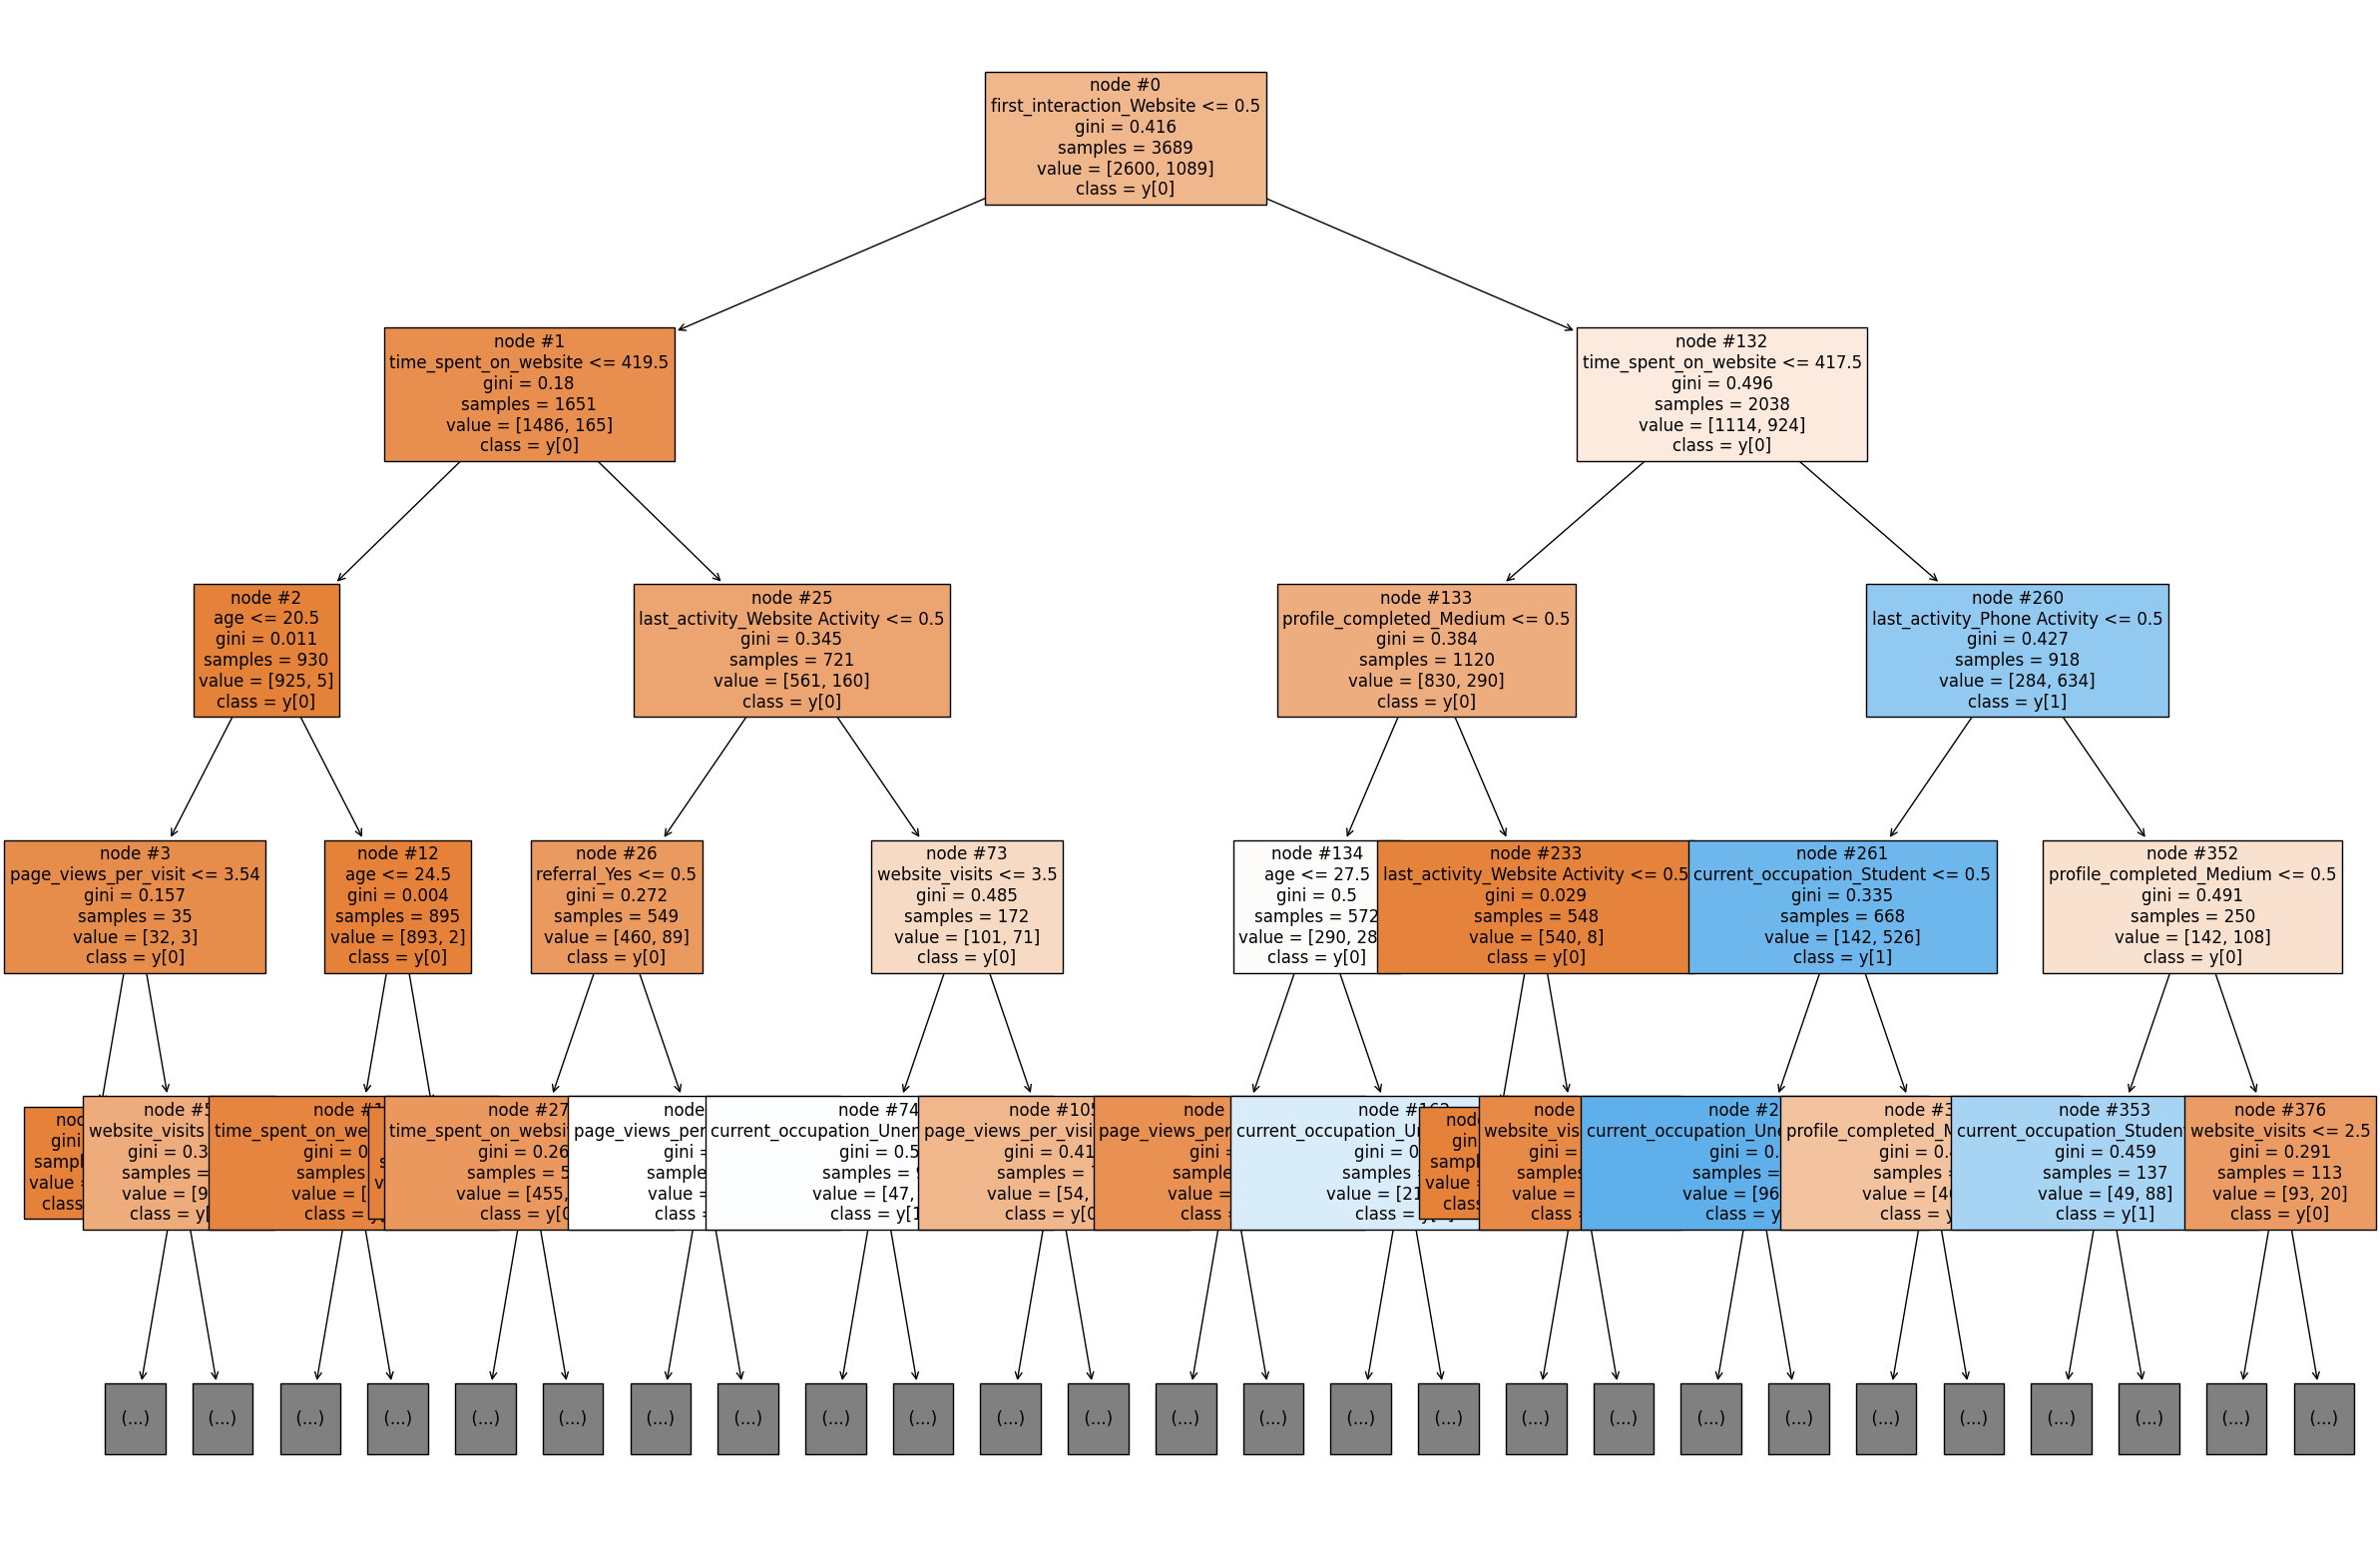

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt_classifier_pruned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [ ]:
#print(tree.export_text(dt_classifier_pruned, feature_names=x_train.columns.tolist(), show_weights=True))

**Observations:**
- The decision tree starts with a split on first_interaction_website and follows with time_spent_on_website.

## Building a Random Forest model

In [ ]:
# Random Forest Regressor
rf_regressor = RandomForestClassifier(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

Metrics of random forest on train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



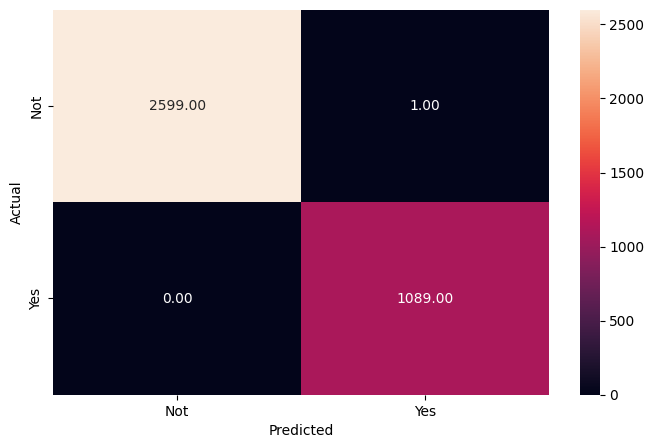

In [ ]:
y_pred_train_rf = rf_regressor.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

## Model Performance on the train data
#rf_regressor_perf_train = model_performance_regression(rf_regressor, x_train, y_train)
#print('The performance of the Random Forest on the train data is: \n',  rf_regressor_perf_train)

Metrics of random forest on test data:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       635
           1       0.83      0.74      0.78       288

    accuracy                           0.87       923
   macro avg       0.86      0.83      0.84       923
weighted avg       0.87      0.87      0.87       923



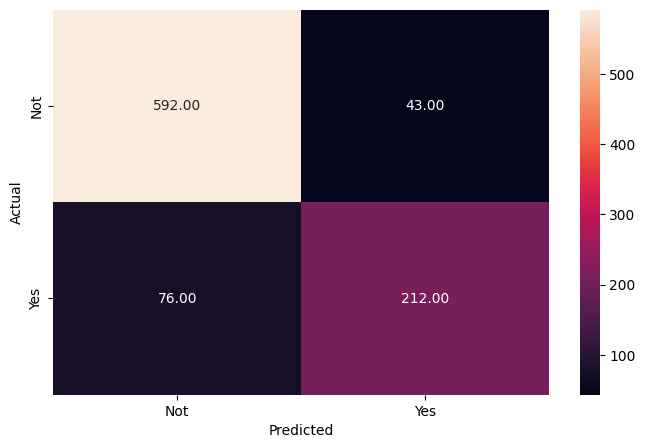

In [ ]:
y_pred_test_rf = rf_regressor.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

## Do we need to prune the tree (random forest)?
#Observation:
- We can see that:\
   -precision-recall for train data: 1-1 \
   -precision-recall for test data: 0.83-0.74 \
- The difference between these train and test results is relatively high, so that there is overfitting.
- Then, we need to tune the random forest.

### **Tuned Random Forest Regressor**

**Note:**  we optimize the parameters:\
- max_depth = max number of levels in each decision tree \
- max_features = max number of features considered for splitting a node \
- n_estimators = number of trees in the foreset \

Running the code below takes some time.

In [ ]:
rf_tuned = RandomForestClassifier(random_state = 1)

# Grid of parameters to choose from
rf_parameters = {"n_estimators": [100, 110, 120],

    "max_depth": [5, 7, 15, 20, 30, 50],

    "max_features": [0.8, 1, 2]
             }

# Run the grid search
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv = 5)

rf_grid_obj = rf_grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = rf_grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=0.8, random_state=1)

Metrics of tuned random forest on training data

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2600
           1       0.84      0.78      0.81      1089

    accuracy                           0.89      3689
   macro avg       0.88      0.86      0.87      3689
weighted avg       0.89      0.89      0.89      3689



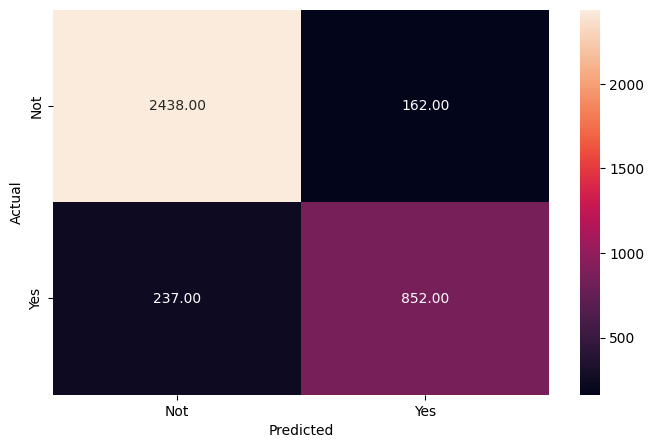

In [ ]:
# Model Performance on the train data
y_pred_train_rf_tuned = rf_tuned_regressor.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

#rf_tuned_regressor_perf_train = model_performance_regression(rf_tuned_regressor, x_train, y_train)
#print('The performance of the tuned random forest is:\n',rf_tuned_regressor_perf_train)

Metrics of tuned random forest on test data

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       635
           1       0.83      0.73      0.78       288

    accuracy                           0.87       923
   macro avg       0.86      0.83      0.84       923
weighted avg       0.87      0.87      0.87       923



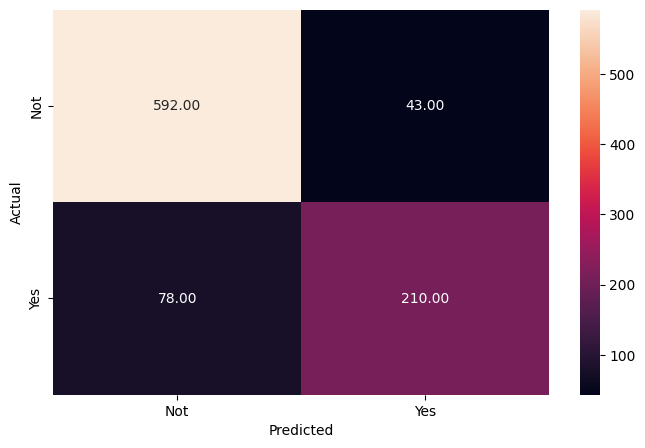

In [ ]:
# Model Performance on the test data
y_pred_test_rf_tuned = rf_tuned_regressor.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
print('The best parameters from fitting the random search are:', rf_grid_obj.best_params_)

The best parameters from fitting the random search are: {'max_depth': 7, 'max_features': 0.8, 'n_estimators': 100}


# Observations:
- We can see that:\
   -precision-recall for train data: 0.84-0.78 \
   -precision-recall for test data: 0.83-0.73 \
- The difference between these train and test results is quite low, so that there is not overfitting.
- The tuning of the random forest has resulted in metrics (accuracy, precision, recall) with quite small difference between train and test data. Therefore, the issue of overfitting has been solved.
- the best parameters from fitting the random search are: max_depth: 7, max_features: 0.8, n_estimators: 100.   



<Axes: xlabel='Importance', ylabel='None'>

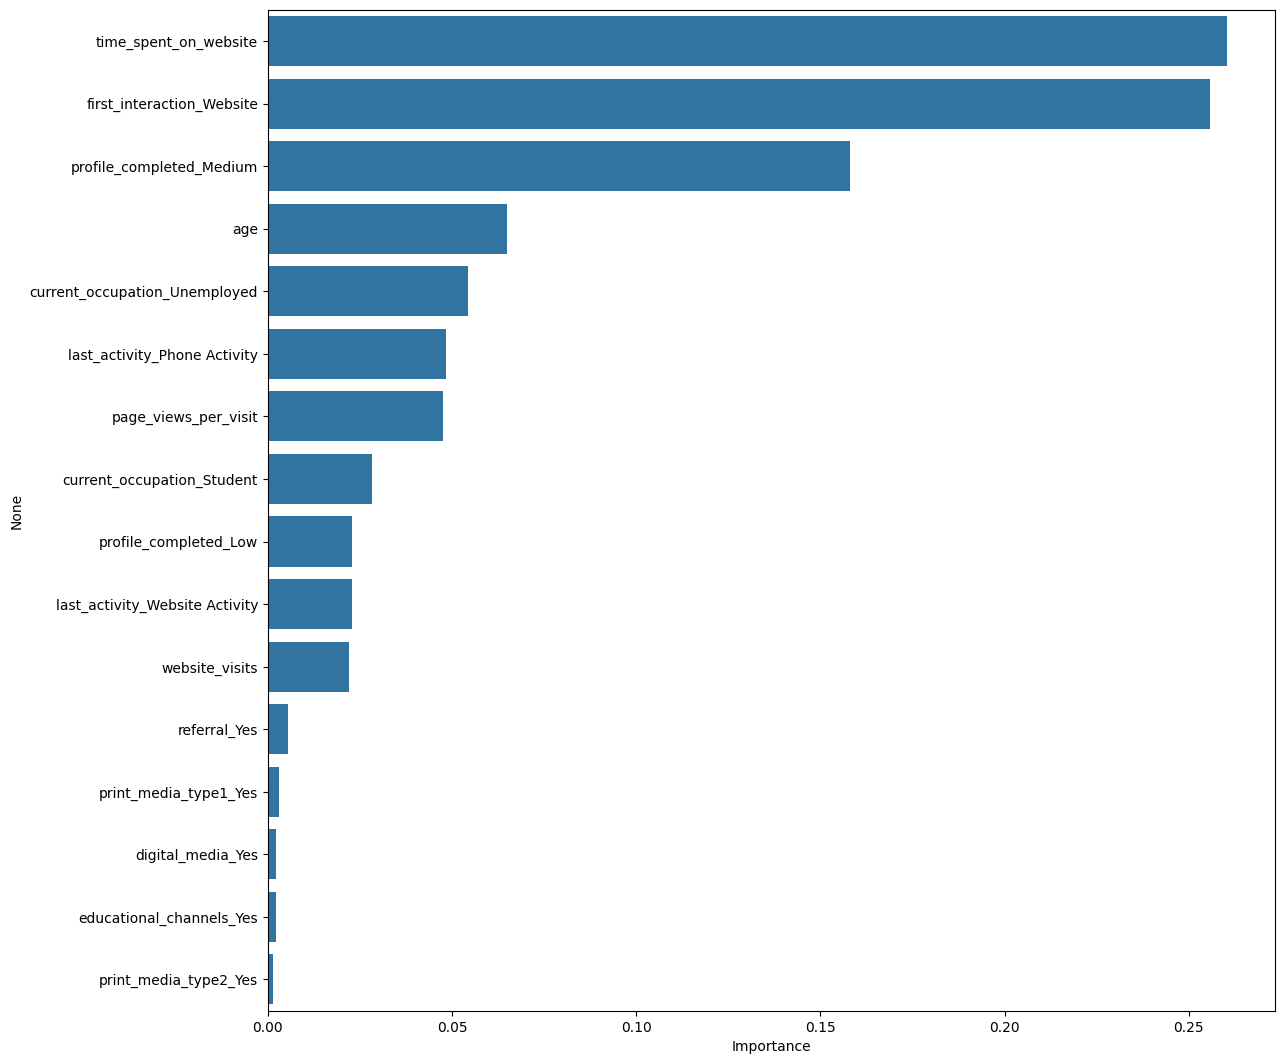

In [ ]:
importances = rf_tuned_regressor.feature_importances_
columns = X.columns
#print(columns)
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

# Observations
- **The feature importance plot for the initial model (pruned decision tree) and that for tuned model (tuned random forest) are quite similar.** The models indicates that 'time_spent_on_website', 'first_interaction_Website', 'profile_completed_Medium', 'age' are the most important features.
- as the main difference between the initial model (pruned decision tree) and tuned model (tuned random forest), 'page_views_per_visit' is not among the five most important features in the tuned random forest.
-In contrast, 'referral_Yes', 'educational_channels_Yes', 'print_media_type1_Yes', 'print_media_type2_Yes' have a low importance.
-We can say that leads with higher likelyhood to become paid customers are characterized by: spend more time on website, their first interaction is through website, have a High level of profile completion; they are older, and their current occupation is professional.
- The channels (print_media_type1, print_media_type2, digital_media,
  educational_channels, referral) have a low importance in the achievement of paid customers. Also, referral is the channel with higher importance.  

## Actionable Insights and Recommendations
#Conclusions
- we have tried decision tree, pruned decision tree,
random forest and tuned random forest.
- the tuning of random forest resulted in avoidance if overfitting.
- the obtained values of precision and recall compared between train and test are very similar, with a precision of 0.83-0.84 and a recall of 0.73-0.78.
- we have identified the key factors involved in the conversion of leads to paid customers.
- it is possible to improve the tuning by including other parameters in the optimization, and by modifying the parameter values used as possible values in the optimization.
#Recommendations:
-we saw that 'time_spent_on_website' and 'first_interaction_Website' are
the most important variables for identifying which leads are more likely to convert to paid customers.  
-then, the ExtraaLearn company should focus on: i) increasing the advertising that motivates people to look at the website; ii) reviewing the website (the information that is given to the readres) and improving it if possible.  
-current_occupation_Unemployed has a higher importance than current_occupation_Student. Therefore, the ExtraaLearn company should focus on unemployed people and Professional people rather than students.

## **Additional content: nonlinear transformation**

Histogram:

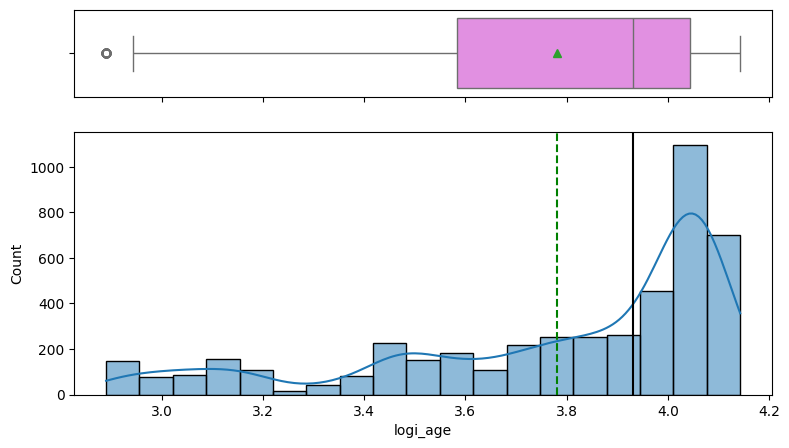

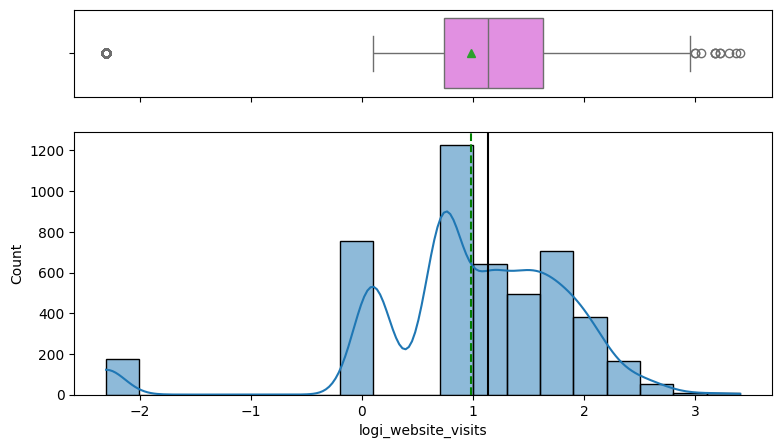

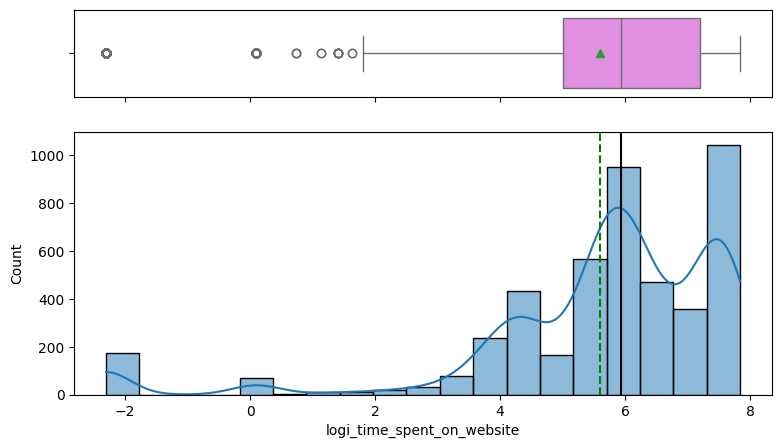

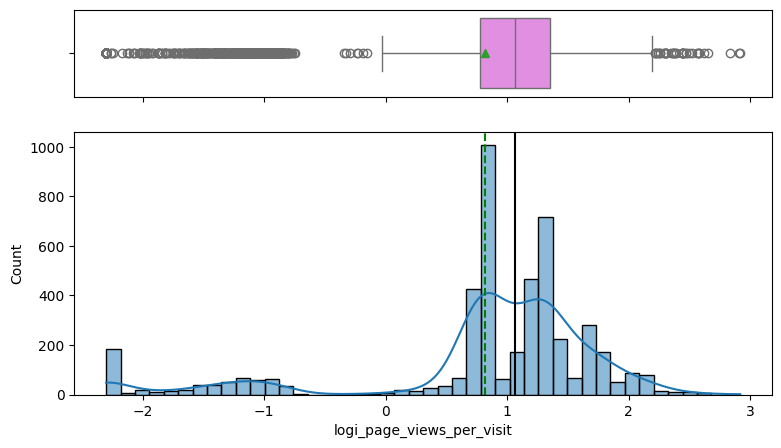

In [ ]:
histogram_boxplot(df, "logi_age", kde = True, bins = 19)
histogram_boxplot(df, "logi_website_visits", kde = True, bins = 19)
histogram_boxplot(df, "logi_time_spent_on_website", kde = True, bins = 19)
histogram_boxplot(df, "logi_page_views_per_visit", kde = True, bins = 44)

<Axes: >

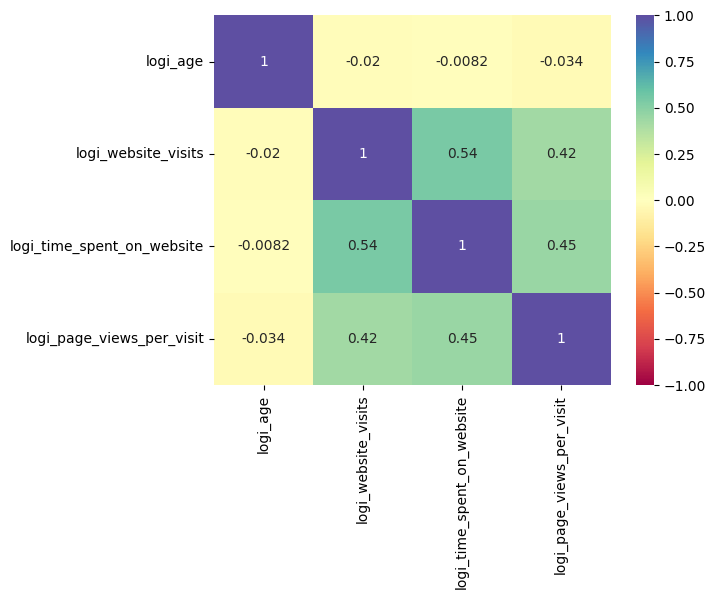

In [ ]:
sns.heatmap(df[['logi_age','logi_website_visits','logi_time_spent_on_website','logi_page_views_per_visit']].corr(), annot = True, cmap = 'Spectral', vmin = -1, vmax = 1)

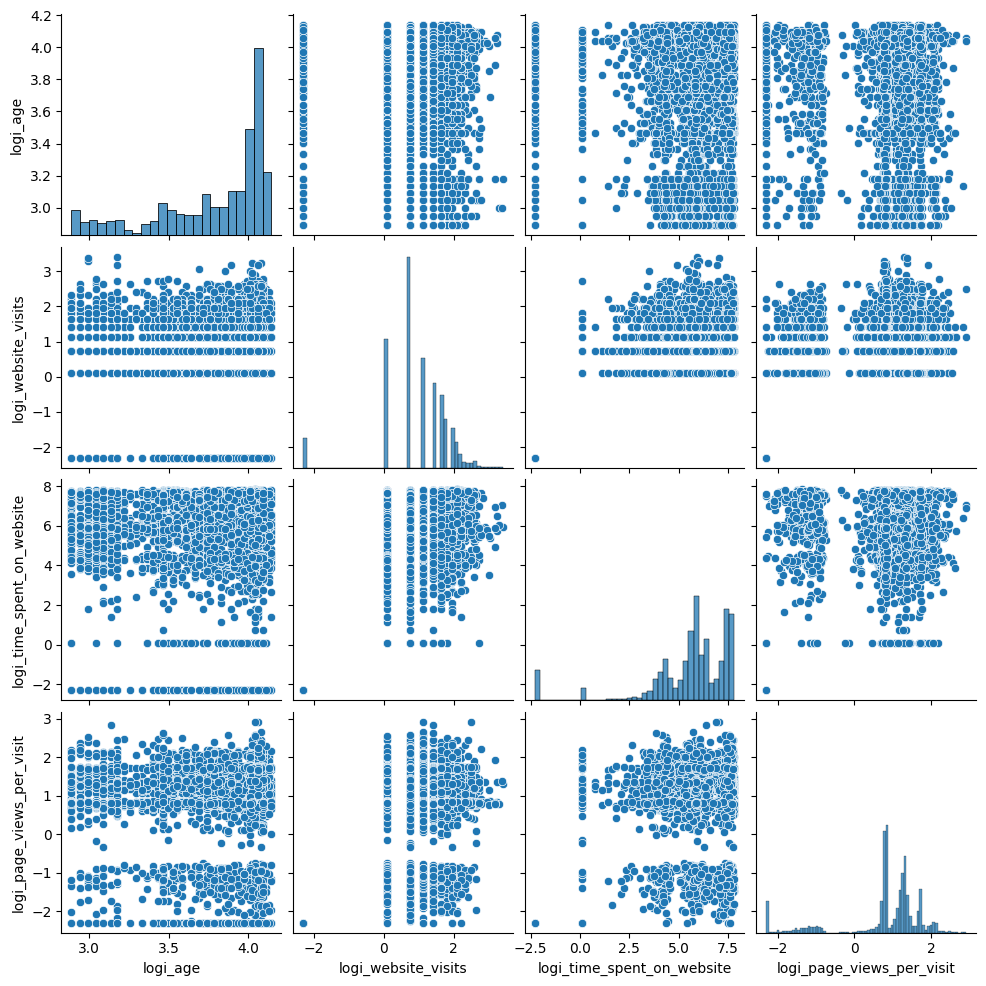

In [ ]:
sns.pairplot(data=df[['logi_age','logi_website_visits','logi_time_spent_on_website','logi_page_views_per_visit']])

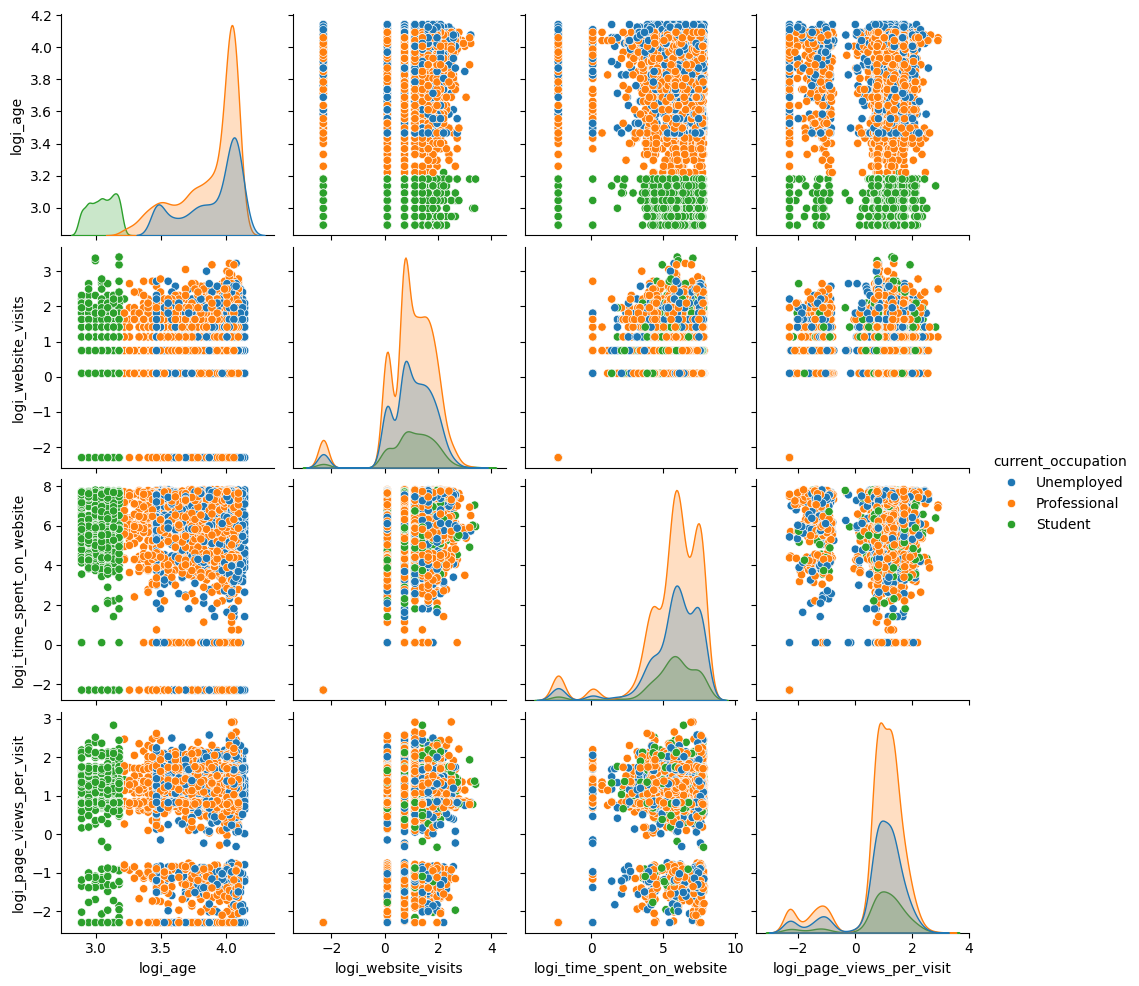

In [ ]:
sns.pairplot(data=df, vars=['logi_age','logi_website_visits','logi_time_spent_on_website','logi_page_views_per_visit'], hue='current_occupation');